<a href="https://colab.research.google.com/github/ruchithabijja/-AlmaBetter--EDA-Global-Terrorism-Analysis/blob/main/Appliancces_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Appliancces Energy Prediction


##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

The appliance energy prediction on predicting the energy consumption of household appliances based on various features such as temperature, humidity, and time of day. The project typically involves data cleaning and preprocessing, exploratory data analysis to understand the relationships between different features and the target variable, feature engineering to create new features or transform existing ones, and finally building and evaluating machine learning models to predict energy consumption. This type of project can be useful for promoting energy efficiency by providing insights into how different household factors affect energy usage, and for helping consumers and utility companies to make more informed decisions about energy consumption and management.





# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


# **Data-driven prediction of energy use of appliances**

**The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Statements**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from math import sqrt

from datetime import datetime
import time
import dateutil

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

#**Loading and inspecting data**


In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/project/project data/data_application_energy.csv')

In [ ]:
# Dataset First Look
#It gives Top 5 rows of Dataset 
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
#It gives last 5 rows of Dataset
dataset.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [ ]:
# It gives Total number of rows and columns of dataset
dataset.shape

(19735, 29)

In [ ]:
#It gives total columns, data types and null count of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# table to return datatype, null count and unique counnt
def printinfo():
    temp = pd.DataFrame(index=dataset.columns)
    temp['data_type'] = dataset.dtypes
    temp['null_count'] = dataset.isnull().sum()
    temp['unique_count'] = dataset.nunique()
    temp['duplicates'] = dataset.duplicated().sum()
    return temp

printinfo()

data_type  null_count  unique_count  duplicates
date           object           0         19735           0
Appliances      int64           0            92           0
lights          int64           0             8           0
T1            float64           0           722           0
RH_1          float64           0          2547           0
T2            float64           0          1650           0
RH_2          float64           0          3376           0
T3            float64           0          1426           0
RH_3          float64           0          2618           0
T4            float64           0          1390           0
RH_4          float64           0          2987           0
T5            float64           0          2263           0
RH_5          float64           0          7571           0
T6            float64           0          4446           0
RH_6          float64           0          9709           0
T7            float64           0          1955           0
RH_7          float64           0          5891           0
T8            float64           0          2228           0
RH_8          float64           0          6649           0
T9            float64           0           924           0
RH_9          float64           0          3388           0
T_out         float64           0          1730           0
Press_mm_hg   float64           0          2189           0
RH_out        float64           0           566           0
Windspeed     float64           0           189           0
Visibility    float64           0           413           0
Tdewpoint     float64           0          1409           0
rv1           float64           0         19735           0
rv2           float64           0         19735           0

**Number of entries : 19735 <br> No of features : 27 ( 2 Random Variables included )<br> Target Variable : Appliances <br> All features are numerical. No categorical variables. There seems to be no null values in our data set.**

In [ ]:
# Dataset Columns
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

1. :**While average temperature inside the building has been around 20 degrees for all the rooms. It ranges from 14 - 30 degrees**
2. **Which implies, Warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation between temperature and consumption of energy inside house.**
1. **Average humidity outside the building has been higher than the average humidity inside.** 
2. **Average humidity at the weather station is significantly higher compared to outside humidity near the building.**
3. **Average humidity in the bathroom is significantly higher compared to other rooms due to obvious reasons.**
4. **Kids and parent room show a comparatively higher average humidity as well signifying the fact that, inhabitants of this building spend most of their time in these buildings.**


<Axes: >

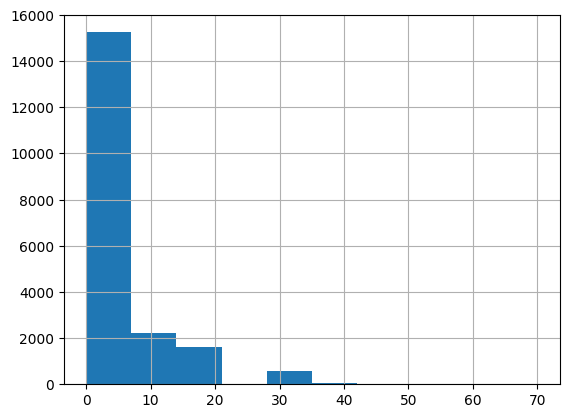

In [ ]:
dataset.lights.hist(bins=10)


In [ ]:
dataset.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

There are many '0' values in 'lights' column so we will drop it. We are separating 'date' column into 'exact date' and 'days' so we will drop original 'date' column.

We need to form a new DataFrame df_dateNappli with right attributes to plot graphs.

We take date and Appliances attributes into the df_dateNappli DataFrame. When we created the new DataFrame, date attribute's type has been changed to objects. Now we need to convert it back to datetime64[ns] type. Then we will set the new DataFrame's index as date.

In [ ]:
df_dateNappli = pd.DataFrame({'date': dataset['date'], 'Appliances': dataset['Appliances']})
df_dateNappli.date=df_dateNappli.date.astype('datetime64[ns]')
df_dateNappli.set_index('date', inplace=True)



```
# This is formatted as code
```

Energy consumption

Appliances energy consumption measurement for the whole period

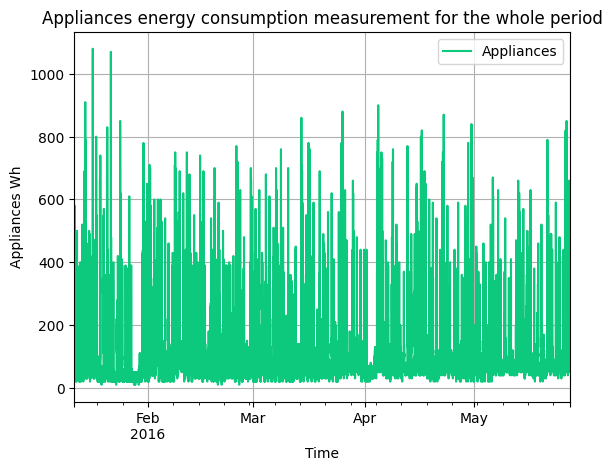

In [ ]:
df_dateNappli.plot(color="#0cc97d")
plt.rcParams["figure.figsize"] = (22,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

The gridlines are also turned on to make it easier to read and interpret the data.


Here it shows the energy consumption profile for the period. The energy consumption profile shows a high variability. We can see from here that the 
highest Appliances Wh is around 1100 and it was in January month. Also, we can see that, at the end of January, February and March, there were big fall down in Appliances useage.

business impact:

reducing energy consumption can have a positive financial impact on a business. By implementing energy-saving measures, such as upgrading equipment, improving insulation, and adopting energy-efficient practices, a business can reduce its energy bills and achieve cost savings.



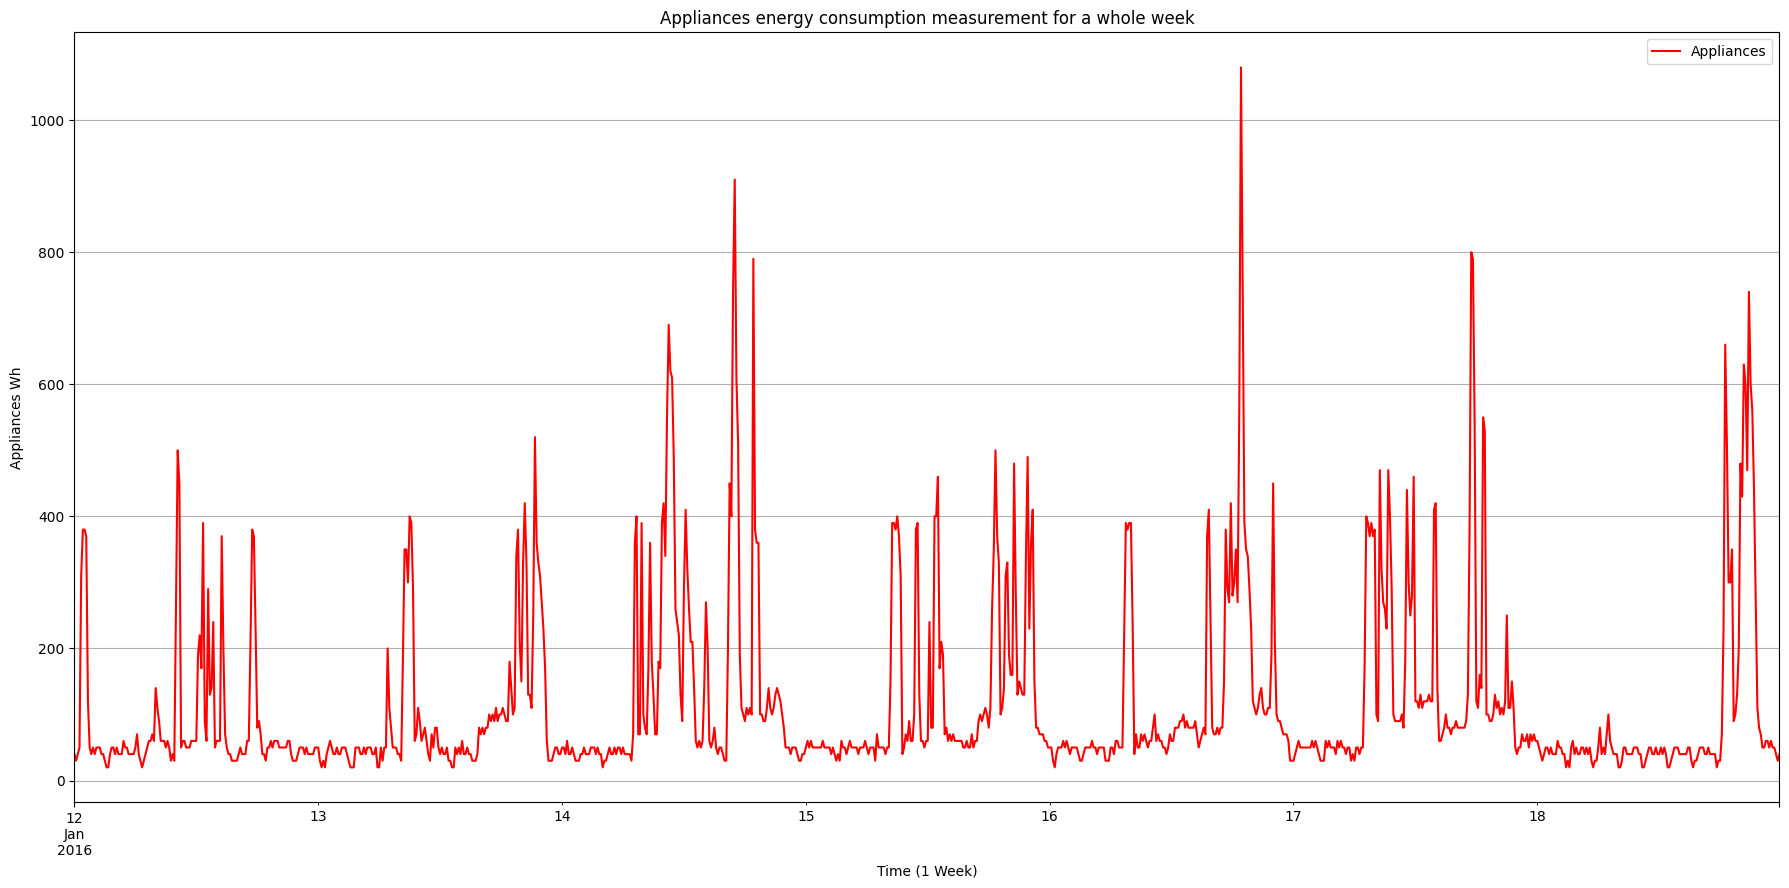

In [ ]:
df_dateNappli['2016-01-12':'2016-01-18'].plot(color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()



Can see from here that the highest Appliances Wh is around 1100 and it was on 16th of January. Also, we can see that, it follows a bit of a pattern though it is not a strong one.

business impact:

in the month of january The higher the energy consumption, the higher the energy bills will be, and this can eat into the business's profits

### Energy Consumption pattern of the household at different times of the day over different time periods

In [ ]:
dataset['weekday'] = ((pd.to_datetime(dataset['date']).dt.dayofweek)// 5 == 0).astype(int)
dataset['hour'] = pd.to_datetime(dataset['date']).dt.hour
dataset['month'] = pd.to_datetime(dataset['date']).dt.month

<Axes: xlabel='hour'>

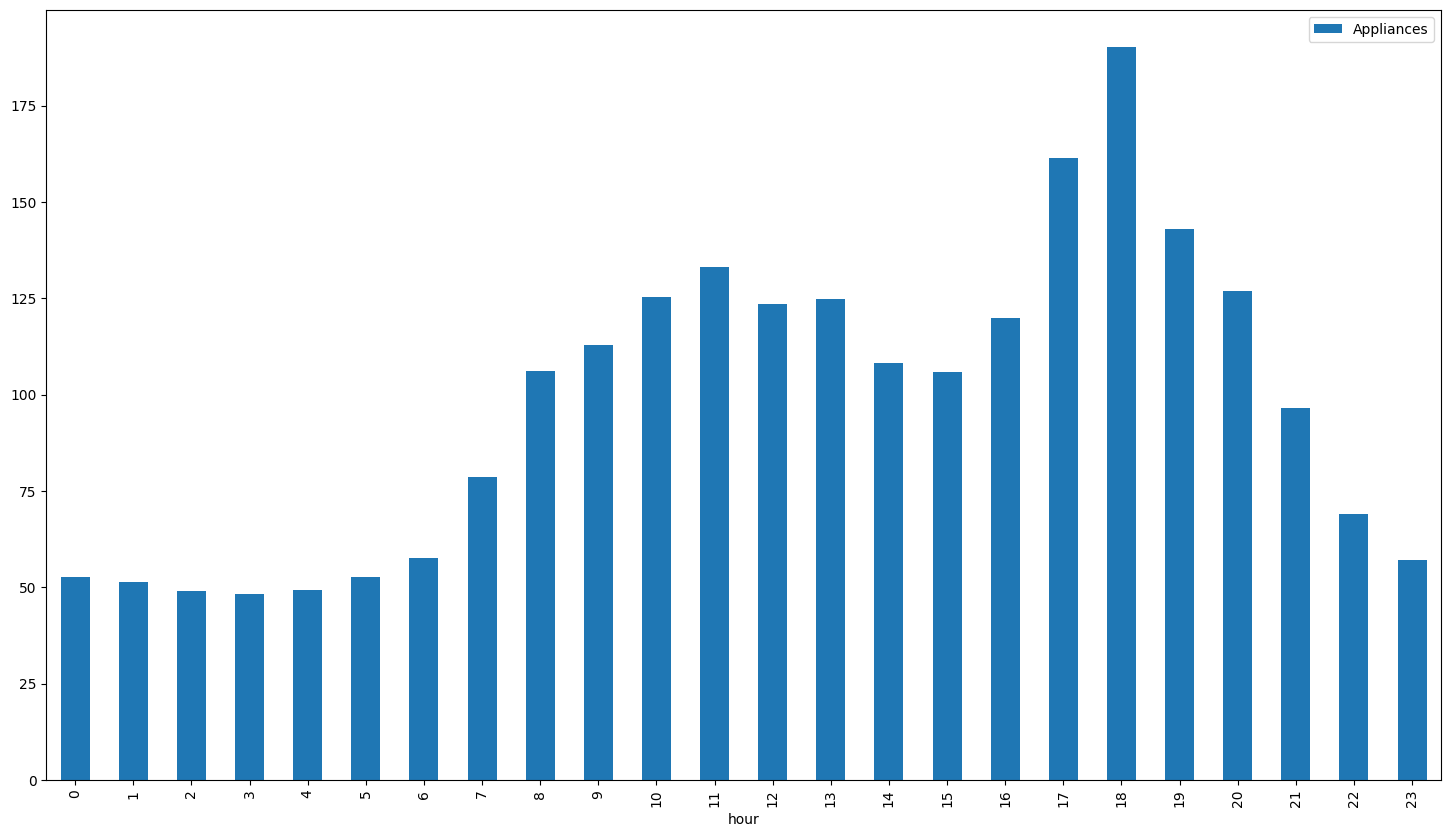

In [ ]:
dataset.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar()

the bar plot is an effective way to visualize and analyze the mean energy consumption of appliances by hour


Above figure is a representation of average energy consumption of appliances at different time of the day over a period of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 6 PM is comparatively higher and sharper.

We observe that over the sleeping hours (10 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

the hourly energy consumption data does not have a significant impact on the business

What about weekdays and weekends?

In [ ]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation

dataset['WEEKDAY'] = ((pd.to_datetime(dataset['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
dataset['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

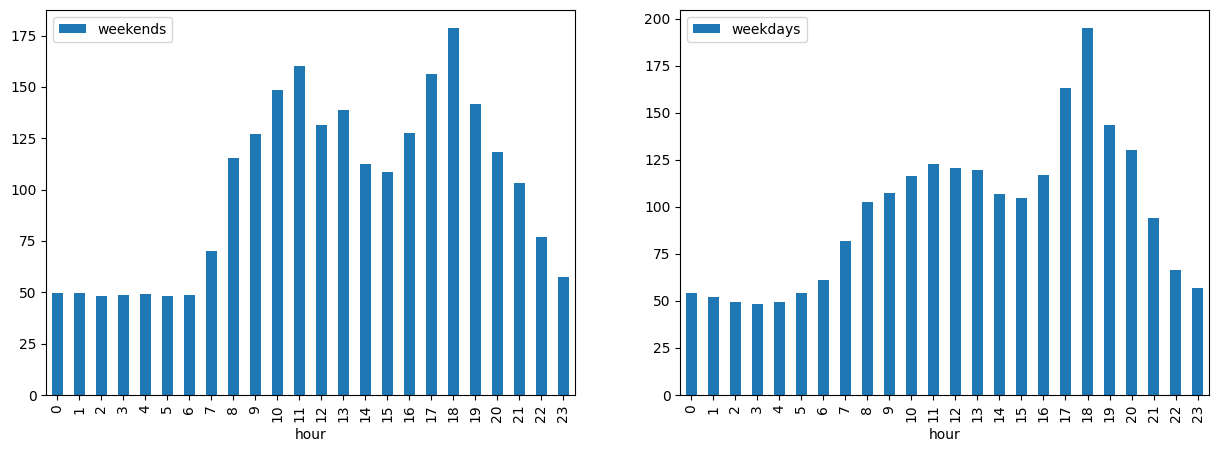

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = dataset.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

The bar plot is an effective way to compare the mean energy consumption of appliances between weekends and weekdays, and to identify any differences or patterns in energy consumption. By using subplots, the code allows for easy comparison of the two bar plots side by side.

We observe that the energy consumption of appliances during the 8 AM - 4 PM is higher in weekends compared to the weekdays. Also, average overall consumption in weekends is pretty high.

not too mach impact on the business between weekends and weekdays

Appliances energy consumption distribution. The histogram shows the frequency of energy consumption in the interval.

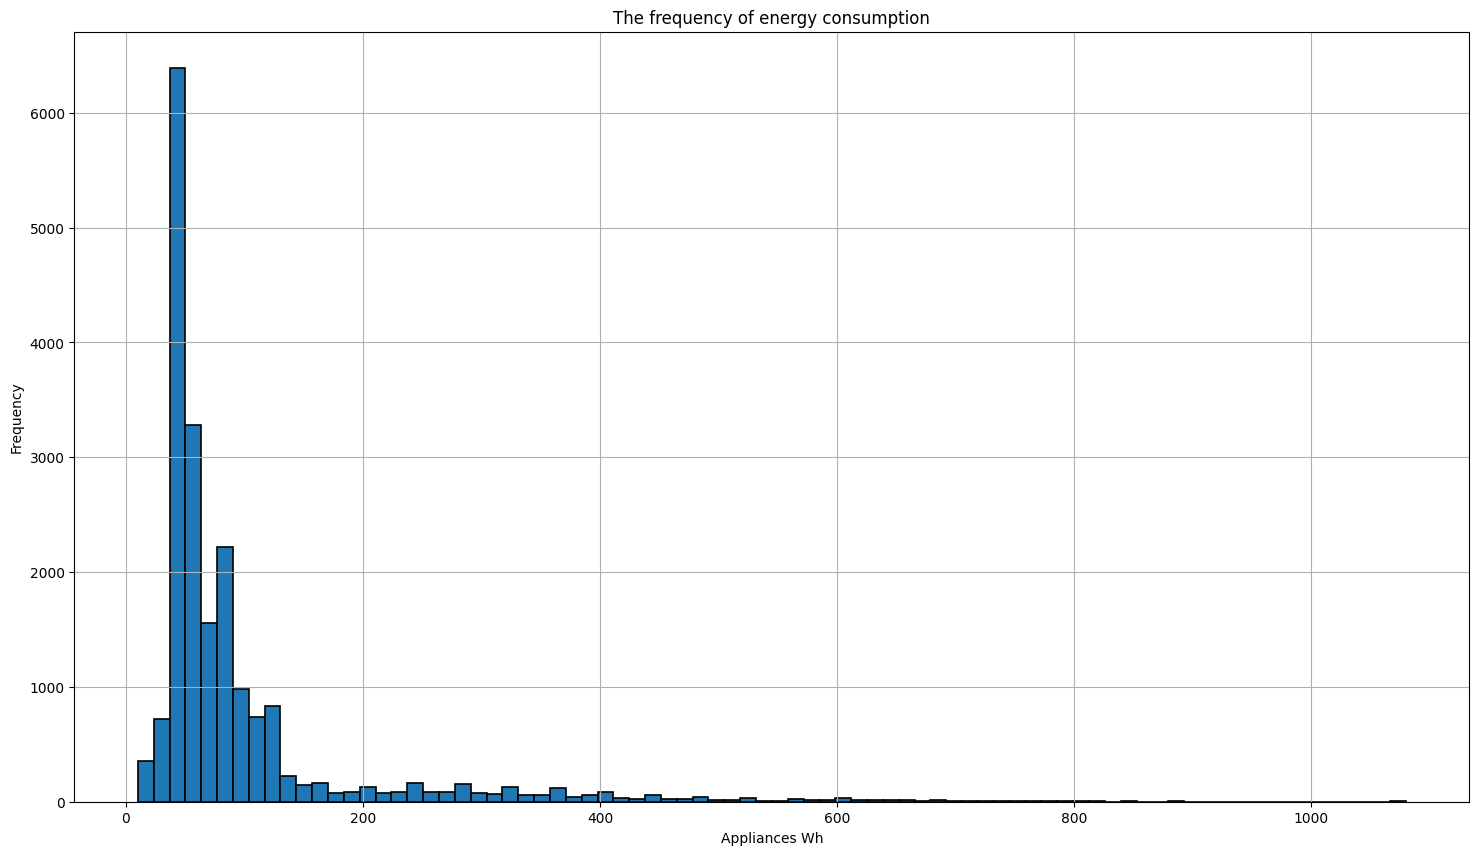

In [ ]:
plt.hist(df_dateNappli.Appliances, bins=80, edgecolor='black', linewidth=1.2)
plt.rcParams["figure.figsize"] = (18,10)
plt.title('The frequency of energy consumption')
plt.grid()
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
plt.show()

The histogram is a useful way to visualize the distribution of the data and identify any patterns or trends in energy consumption. By using a large number of bins (80), the code provides a detailed view of the data and allows for a more accurate analysis of the frequency distribution.



<ipython-input-29-5175304d95c5>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Appliances'] , bins=10 )


<Axes: xlabel='Appliances', ylabel='Frequency'>

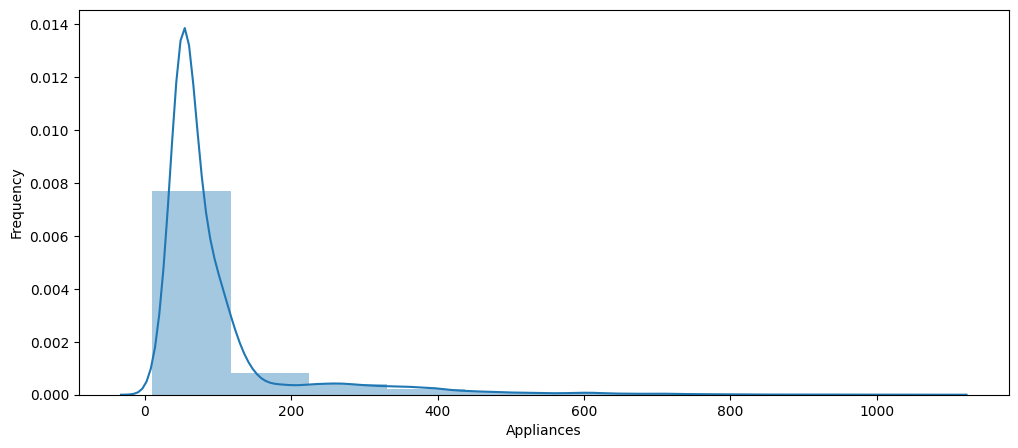

In [ ]:
# Distribution of values in Appliances column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(dataset['Appliances'] , bins=10 )

the kernel density estimate shows the probability density function of the data, which can provide more detailed information about the shape of the distribution.

In [ ]:
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...    92.0   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...    92.0   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...    92.0   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2  weekday  hour  month  WEEKDAY  
0  13.275433  13.275433        1    17      1      0.0  
1  18.606195  18.606195        1    17      1      0.0  
2  28.642668  28.642668        1    17      1      0.0  
3  45.410389  45.410389        1    17      1      0.0  
4  10.084097  10.084097        1    17      1      0.0  

[5 rows x 33 columns]

In [ ]:
#It gives some basic statistical details like percentile, mean, std, max etc.
dataset.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...        RH_out     Windspeed    Visibility     Tdewpoint  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     79.750418      4.039752     38.330834      3.760707   
std    ...     14.901088      2.451221     11.794719      4.194648   
min    ...     24.000000      0.000000      1.000000     -6.600000   
25%    ...     70.333333      2.000000     29.000000      0.900000   
50%    ...     83.666667      3.666667     40.000000      3.433333   
75%    ...     91.666667      5.500000     40.000000      6.566667   
max    ...    100.000000     14.000000     66.000000     15.500000   

                rv1           rv2       weekday          hour         month  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      24.988033     24.988033      0.722726     11.502002      3.101647   
std       14.496634     14.496634      0.447664      6.921953      1.339200   
min        0.005322      0.005322      0.000000      0.000000      1.000000   
25%       12.497889     12.497889      0.000000      6.000000      2.000000   
50%       24.897653     24.897653      1.000000     12.000000      3.000000   
75%       37.583769     37.583769      1.000000     17.000000      4.000000   
max       49.996530     49.996530      1.000000     23.000000      5.000000   

            WEEKDAY  
count  19735.000000  
mean       0.277274  
std        0.447664  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 32 columns]


Here, Appliances have mean value around 100 and minimum value is 10 whereas maximum is 1080. So we can ignore outliers.


Here, Appliances have asymmetry in the distribution and we can say that the tail is larger towards the right hand side of the distribution.

In [ ]:
dataset.skew()

<ipython-input-32-8035be43cde7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
weekday       -0.995160
hour          -0.000673
month         -0.067969
WEEKDAY        0.995160
dtype: float64

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'weekday', 'hour', 'month', 'WEEKDAY'],
      dtype='object')

<ipython-input-34-bcf0a2b0a958>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Appliances'],color="r")


<Axes: xlabel='Appliances', ylabel='Density'>

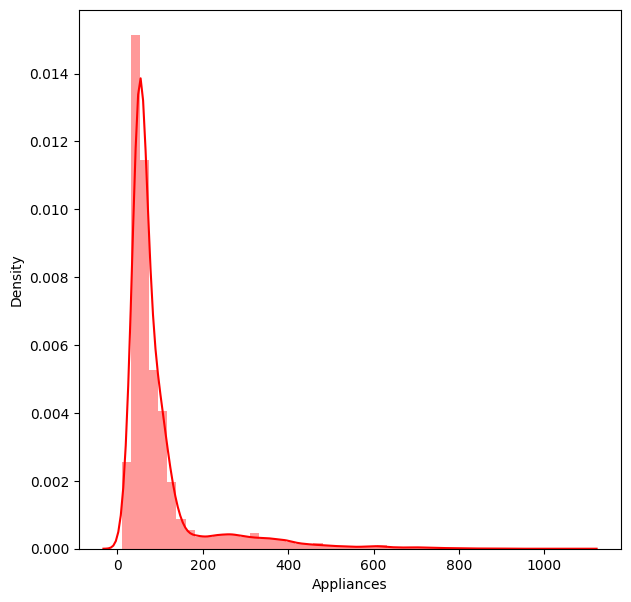

In [ ]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Appliances'],color="r")


This plot is a density plot of the distribution of values in the 'Appliances' column of the dataset. It shows the shape of the distribution and the probability density of different values in the column.

Applying log transformation to the dependent variable for skewed distribution in large dataset.

<ipython-input-35-0a510cc58265>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset['Appliances']),color="r")


<Axes: xlabel='Appliances', ylabel='Density'>

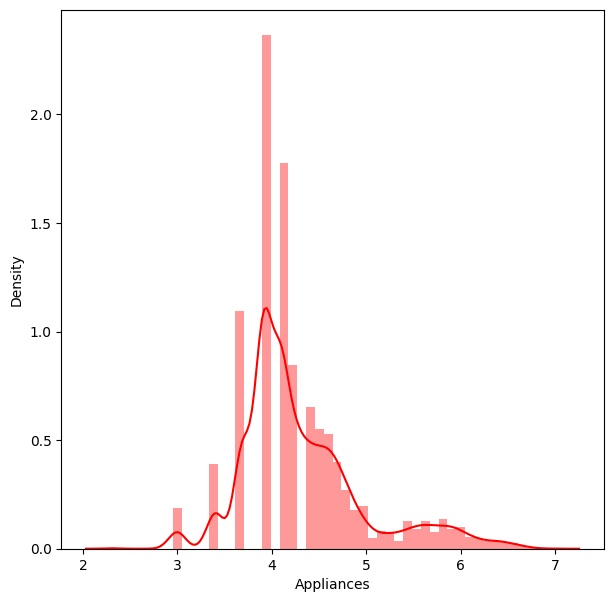

In [ ]:
# Dependent variable 'Appliances'
plt.figure(figsize=(7,7))
sns.distplot(np.log(dataset['Appliances']),color="r")

apply a log transformation to the 'Appliances'making the distribution more symmetrical and This could help us to better visualize the distribution.

In [ ]:
#It returns a series containing counts of unique values.
dataset['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64

In [ ]:
print(dataset['Appliances'].mean())

97.6949581960983


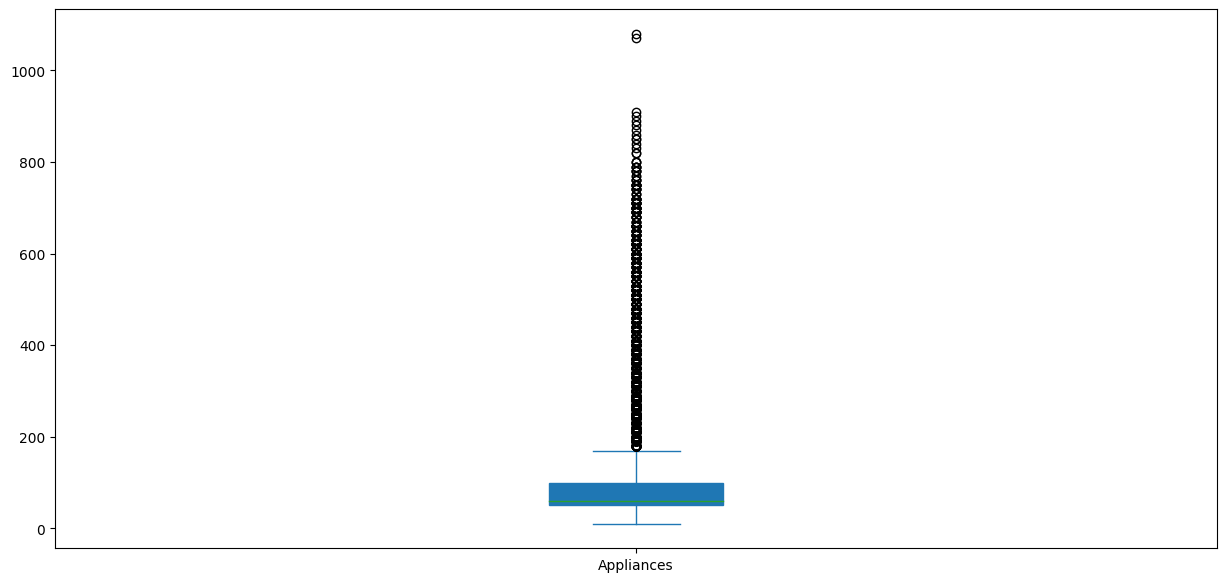

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["Appliances"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

Here, Appliances usage mean value is 97.69, So we are calculating Percentage of the Appliance Consumption which are less than 100 Wh(nearby 97.69).

box plots can help to identify and visualize outliers, they do not necessarily "remove" outliers. Instead, they provide a visual tool for understanding the distribution of the data and identifying any extreme values that may be affecting the analysis.

In [ ]:
print('Percentage of the appliance consumption less than 100 Wh')
print(((dataset['Appliances'][dataset['Appliances'] <= 100].count()) / (len(dataset['Appliances'])))*100 )

Percentage of the appliance consumption less than 100 Wh
78.55079807448695


Here,we are removing two outliers from 'Appliances'.

In [ ]:
print(dataset['Appliances'].max())

1080


In [ ]:
dataset.drop(dataset[dataset['Appliances']==1080].index, inplace=True)

In [ ]:
print(dataset['Appliances'].max())

1070


In [ ]:
dataset.drop(dataset[dataset['Appliances']==1070].index, inplace=True)

Converting percentage value of all the Relative humdities (RH) into decimals

In [ ]:
#convert the percentage value of RH into decimals
def decimal(number):
  return number/100

In [ ]:
dataset[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']]=dataset[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']].apply(decimal)

In [ ]:
dataset.head()

date  Appliances  lights     T1      RH_1    T2      RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  0.475967  19.2  0.447900   
1  2016-01-11 17:10:00          60      30  19.89  0.466933  19.2  0.447225   
2  2016-01-11 17:20:00          50      30  19.89  0.463000  19.2  0.446267   
3  2016-01-11 17:30:00          50      40  19.89  0.460667  19.2  0.445900   
4  2016-01-11 17:40:00          60      40  19.89  0.463333  19.2  0.445300   

      T3      RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  0.447300  19.000000  ...    0.92   7.000000   63.000000        5.3   
1  19.79  0.447900  19.000000  ...    0.92   6.666667   59.166667        5.2   
2  19.79  0.449333  18.926667  ...    0.92   6.333333   55.333333        5.1   
3  19.79  0.450000  18.890000  ...    0.92   6.000000   51.500000        5.0   
4  19.79  0.450000  18.890000  ...    0.92   5.666667   47.666667        4.9   

         rv1        rv2  weekday  hour  month  WEEKDAY  
0  13.275433  13.275433        1    17      1      0.0  
1  18.606195  18.606195        1    17      1      0.0  
2  28.642668  28.642668        1    17      1      0.0  
3  45.410389  45.410389        1    17      1      0.0  
4  10.084097  10.084097        1    17      1      0.0  

[5 rows x 33 columns]

Using a box plot, we can visualize the distribution of temperature data and identify any outliers present in the data.

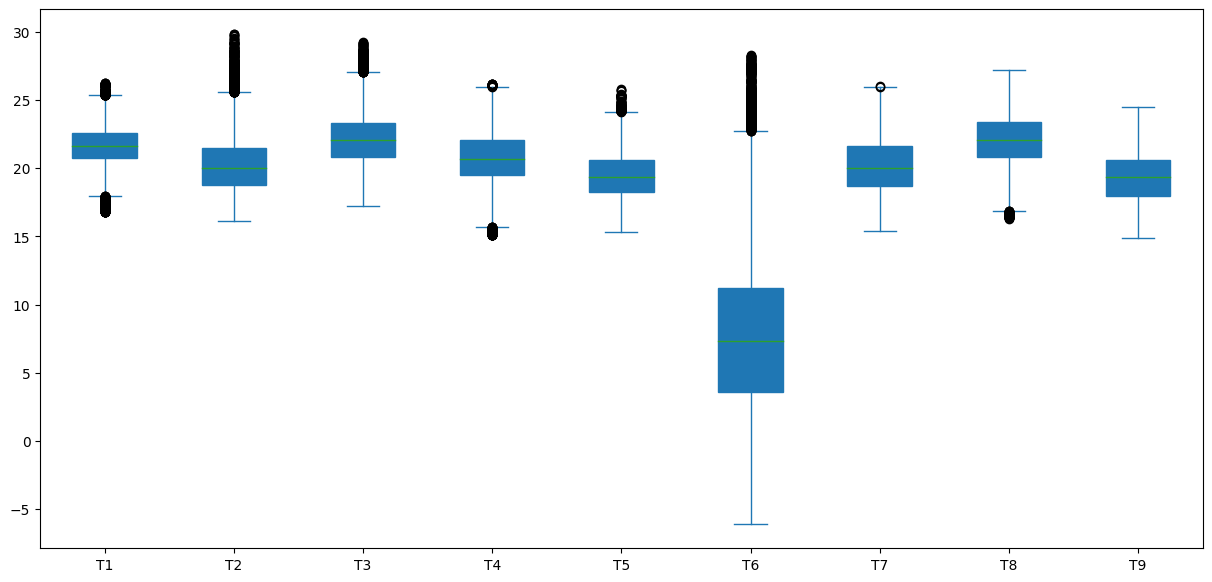

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

Using a box plot, we can visualize the distribution of humidity conditions data and identify any outliers present in the data.

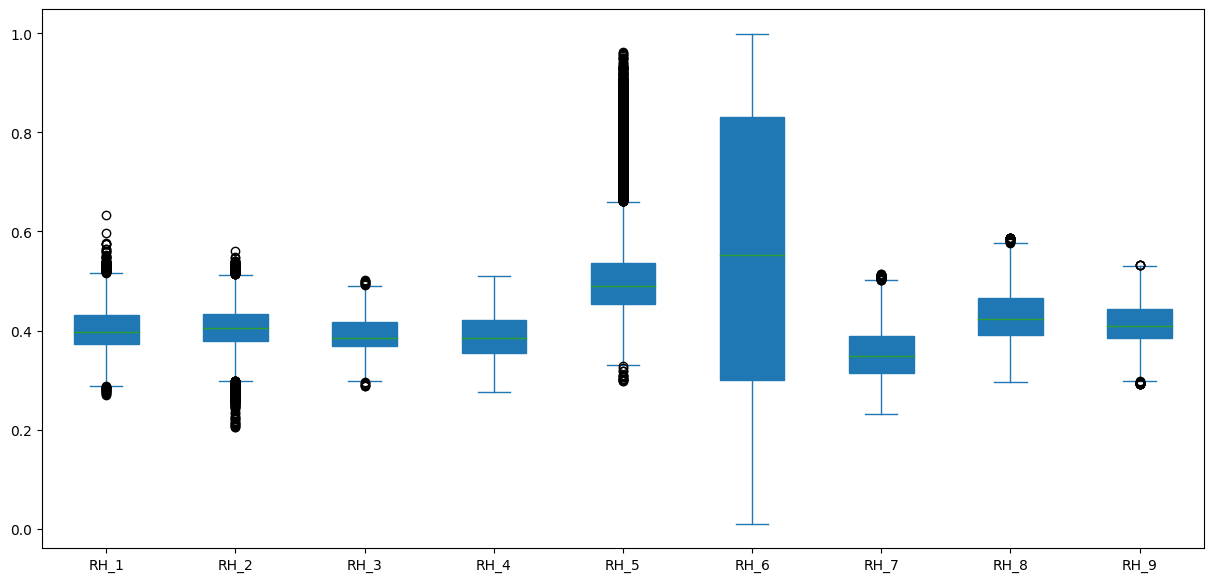

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

Using a box plot, we can visualize the distribution of the particular and identify any outliers present in the data.

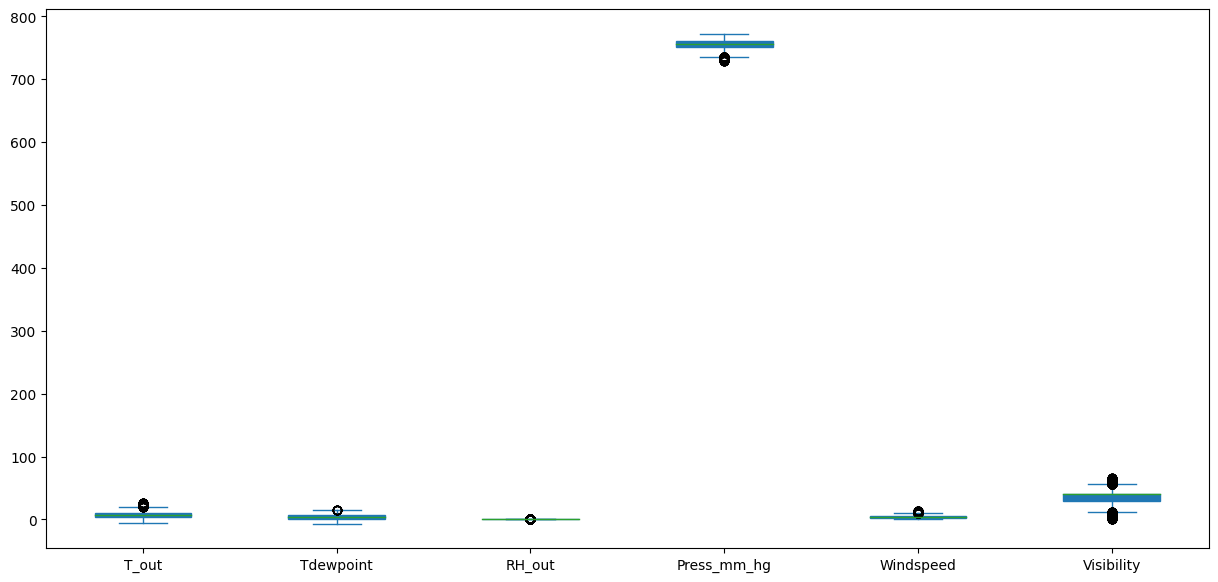

In [ ]:
df = pd.DataFrame(data = dataset, columns = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"])
df.plot(kind='box',patch_artist=True,figsize=(15,7))
plt.show()

<ipython-input-50-4c6efacf1af2>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9, 6))


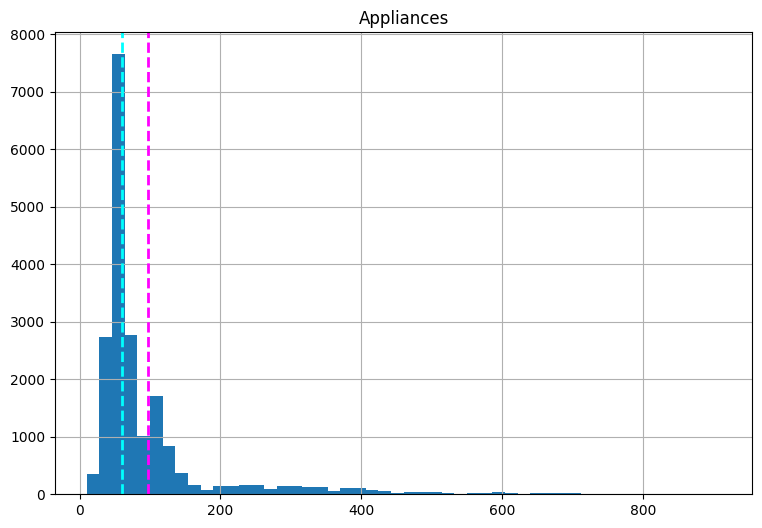

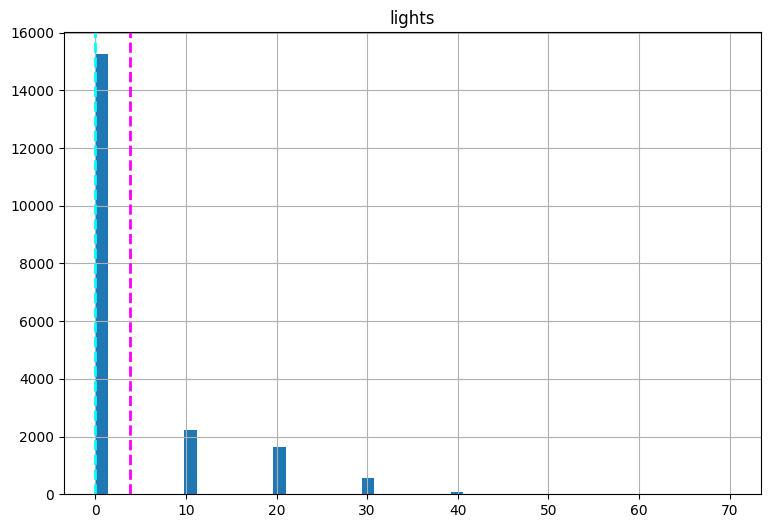

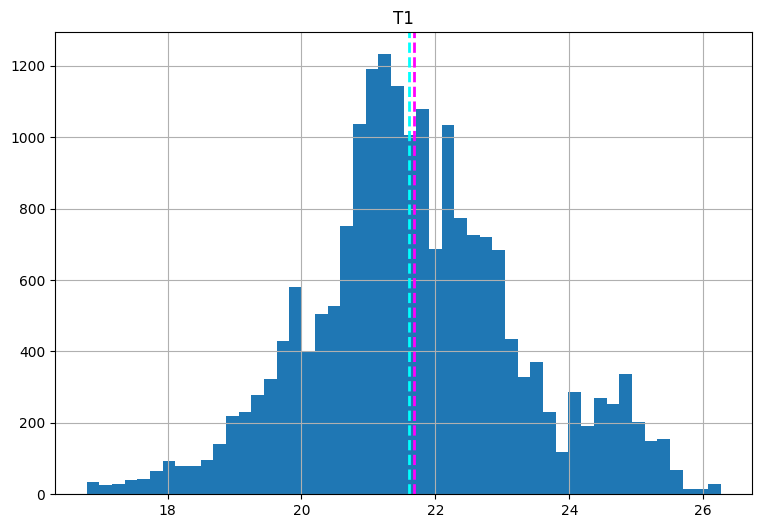

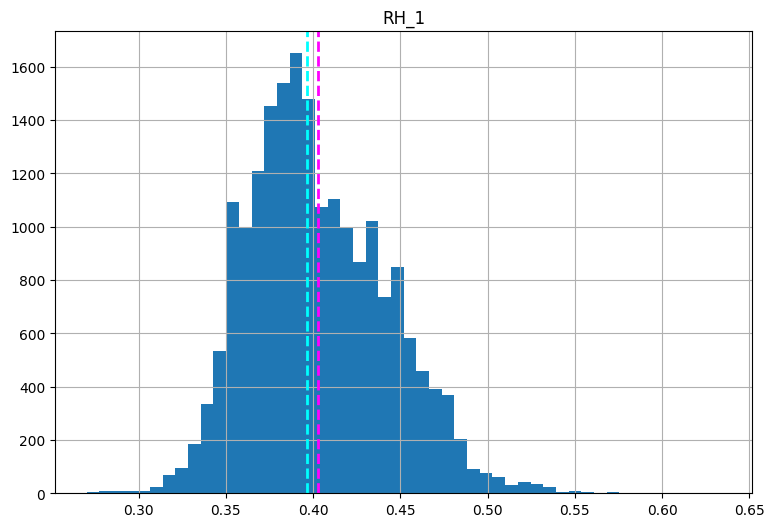

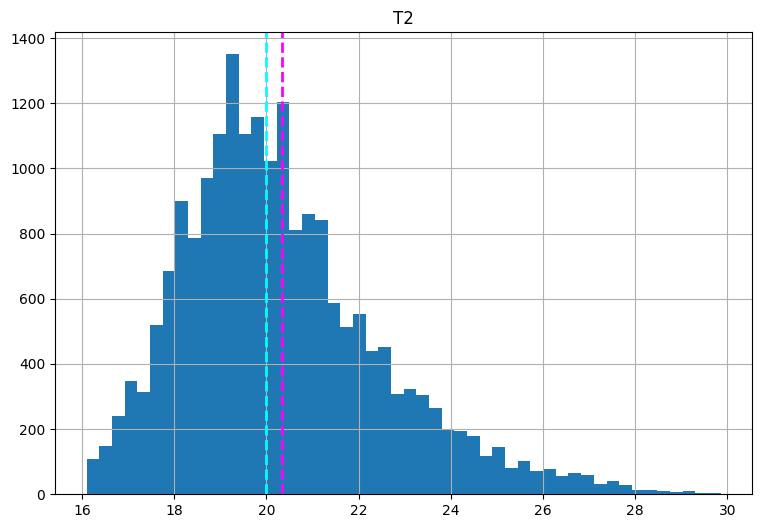

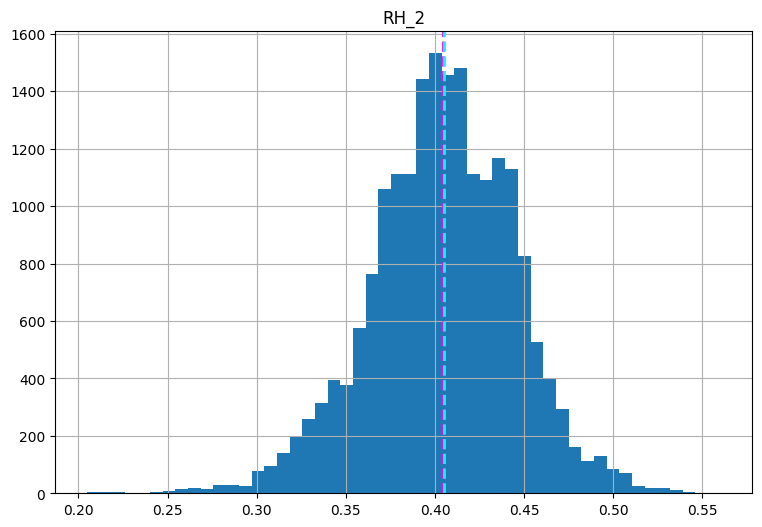

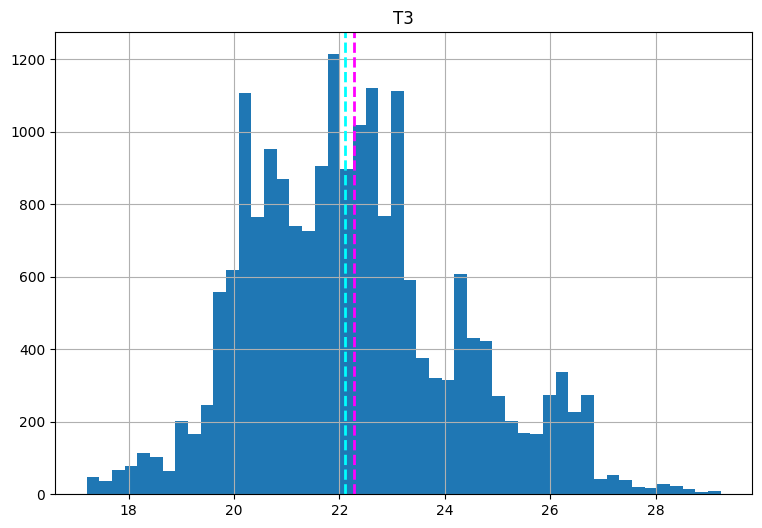

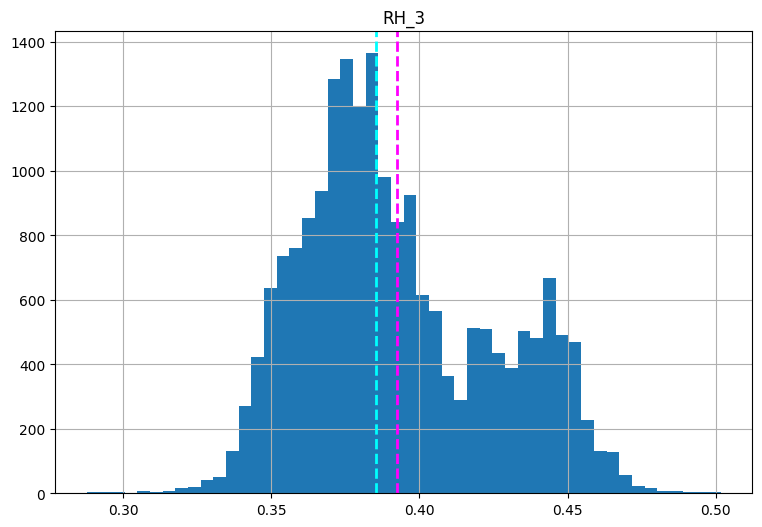

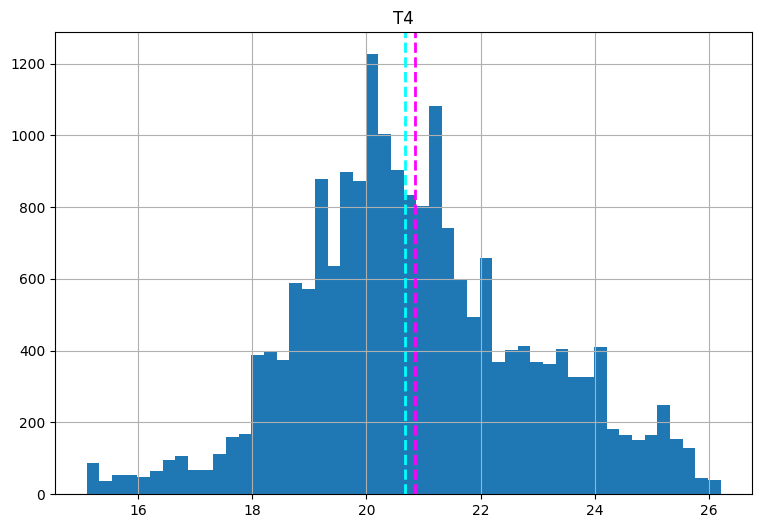

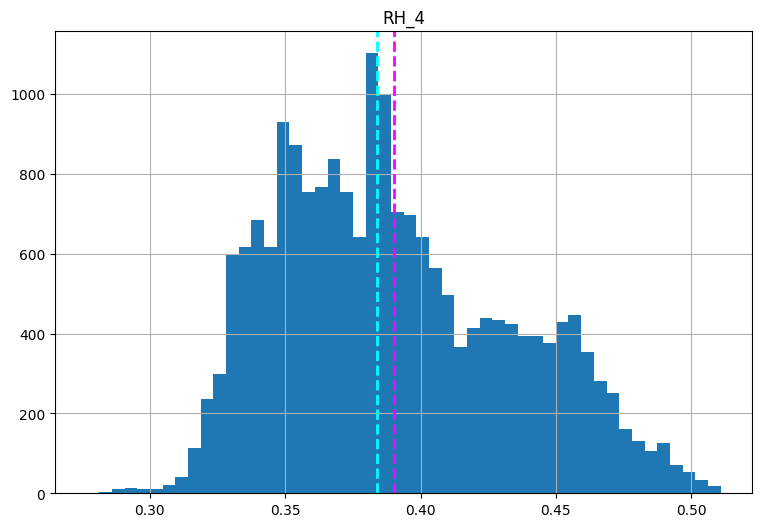

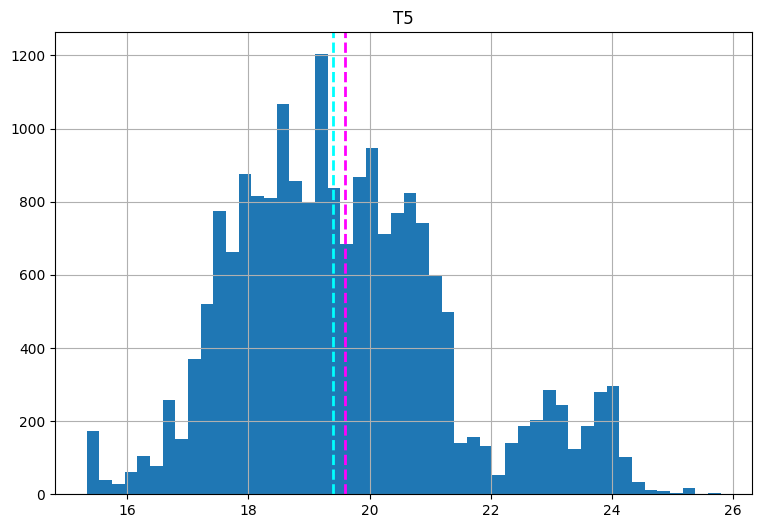

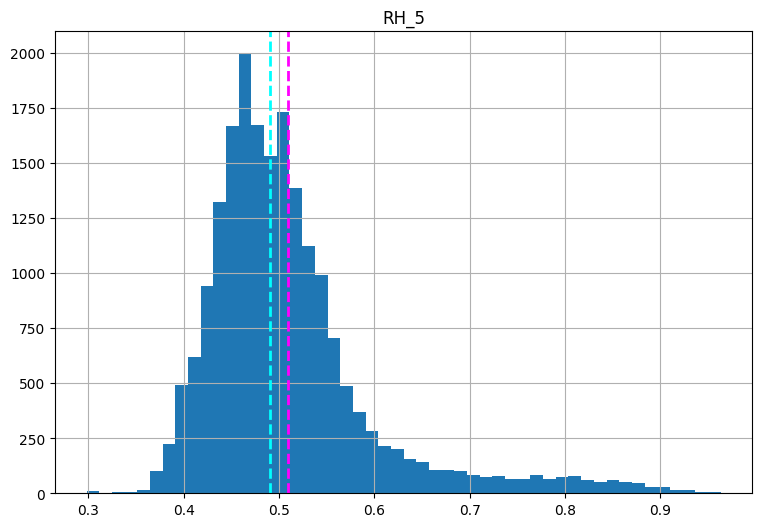

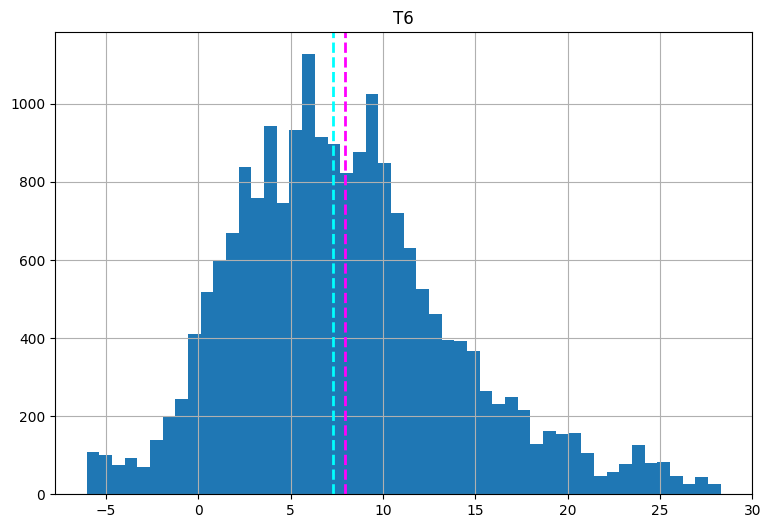

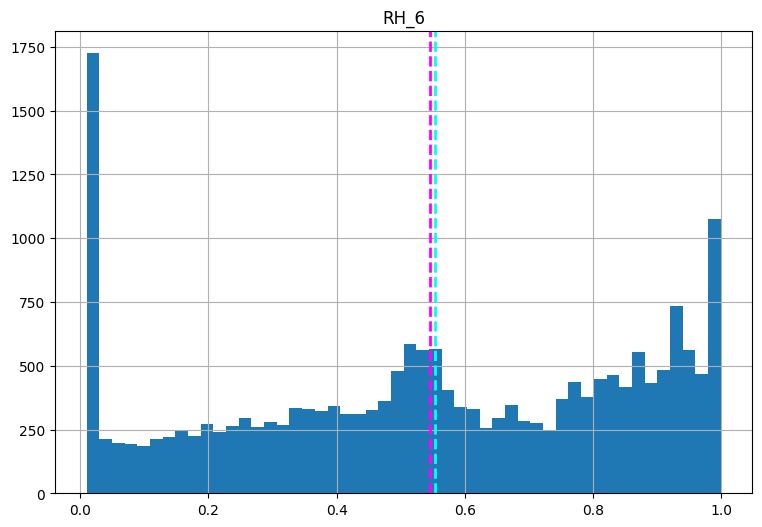

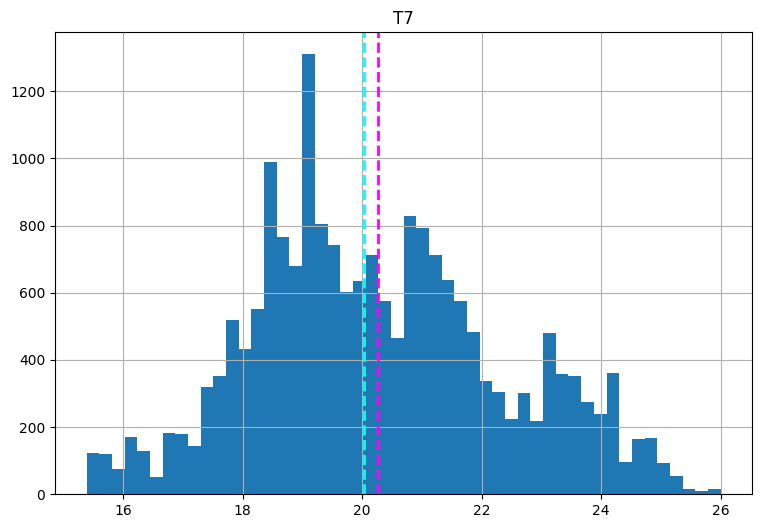

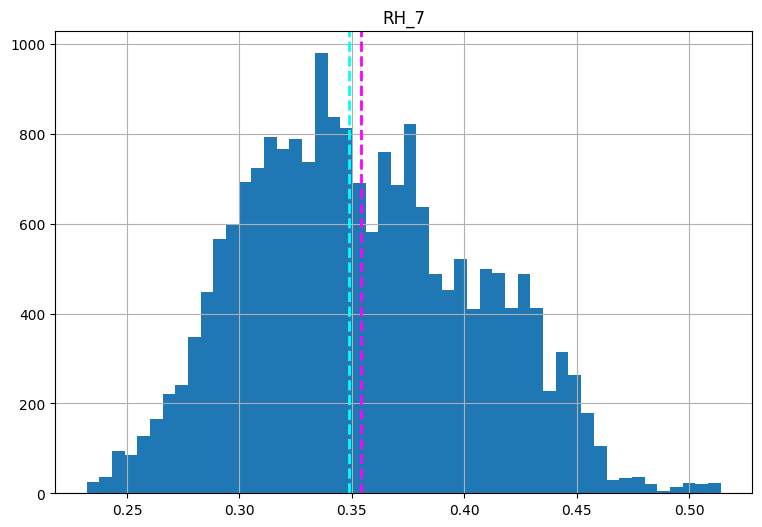

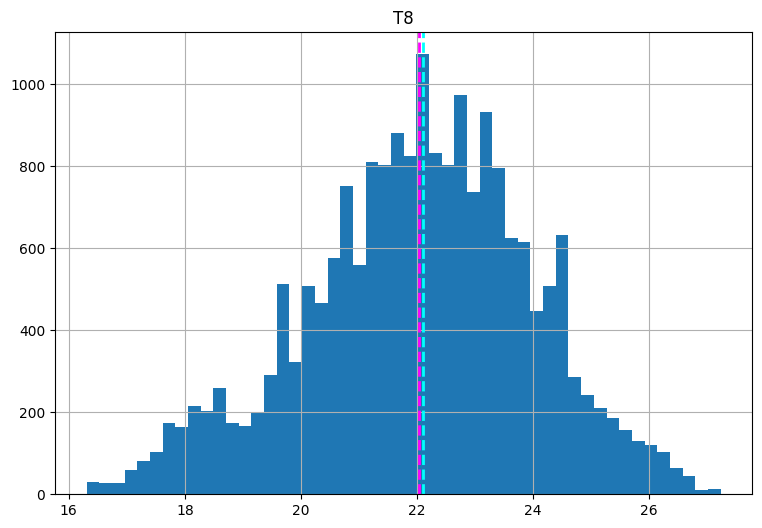

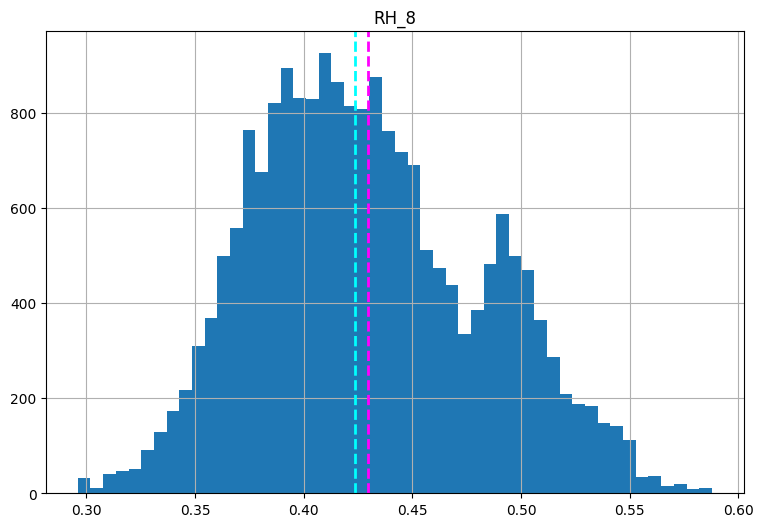

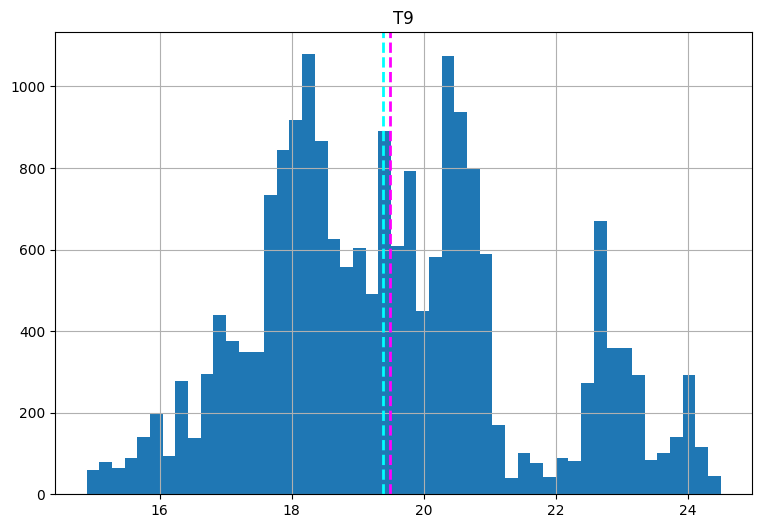

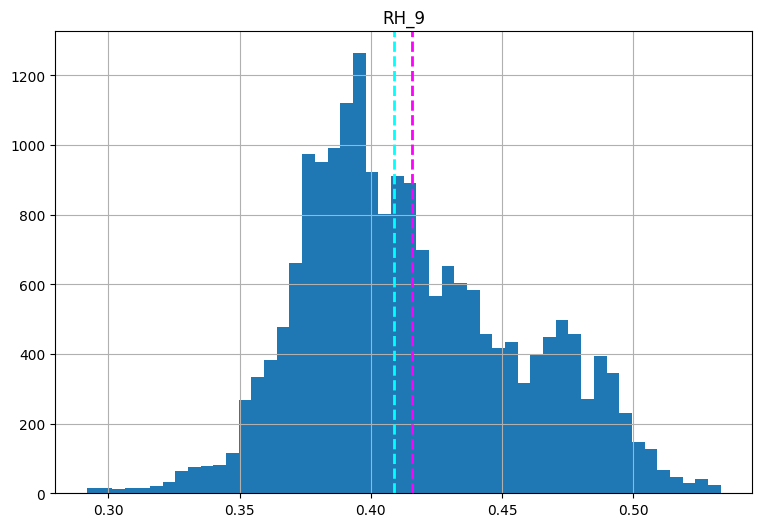

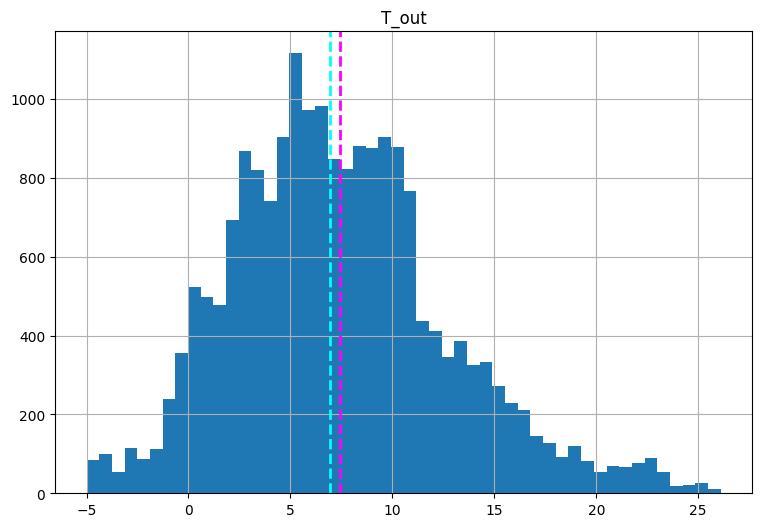

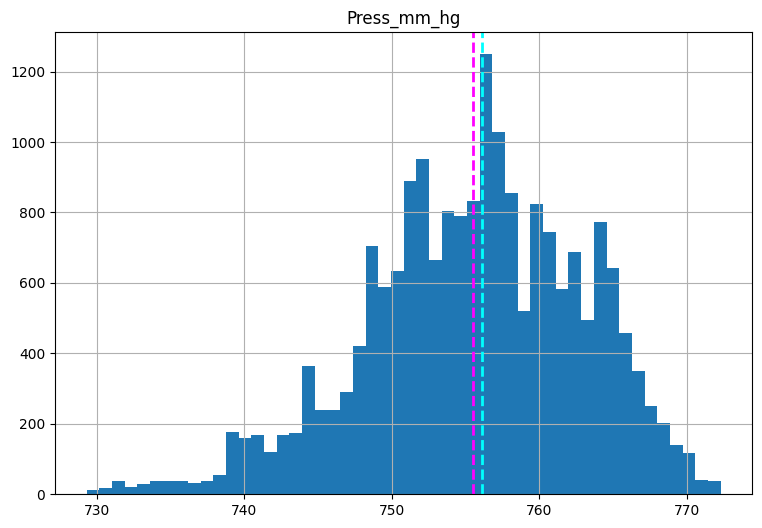

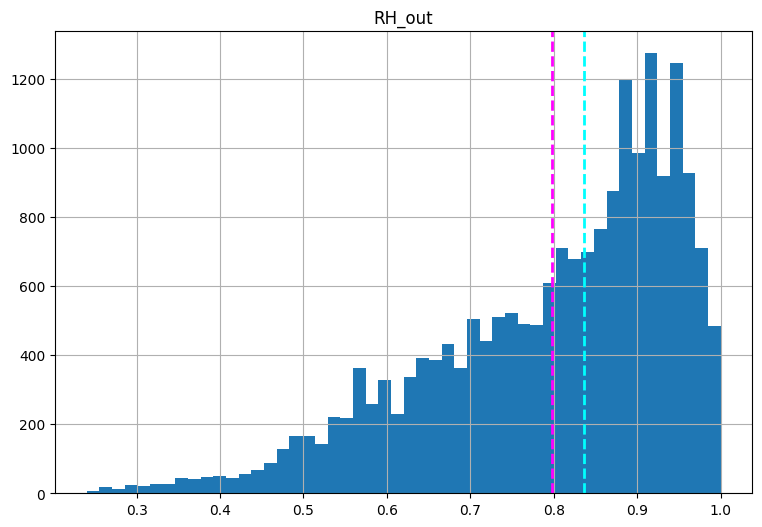

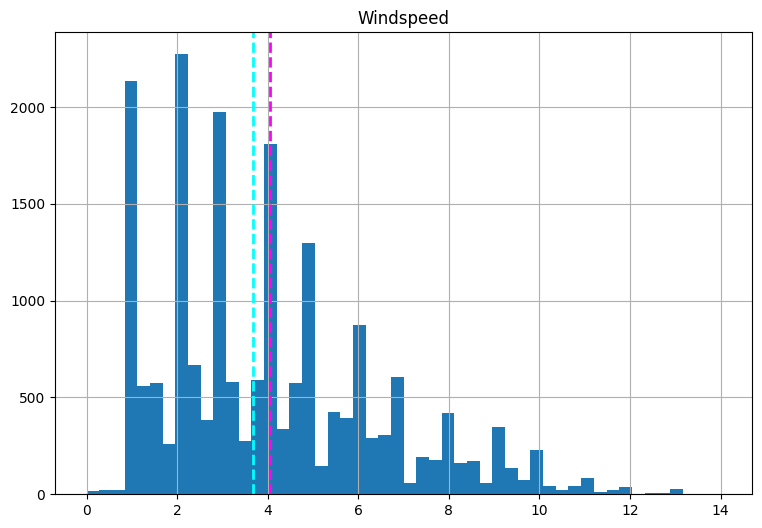

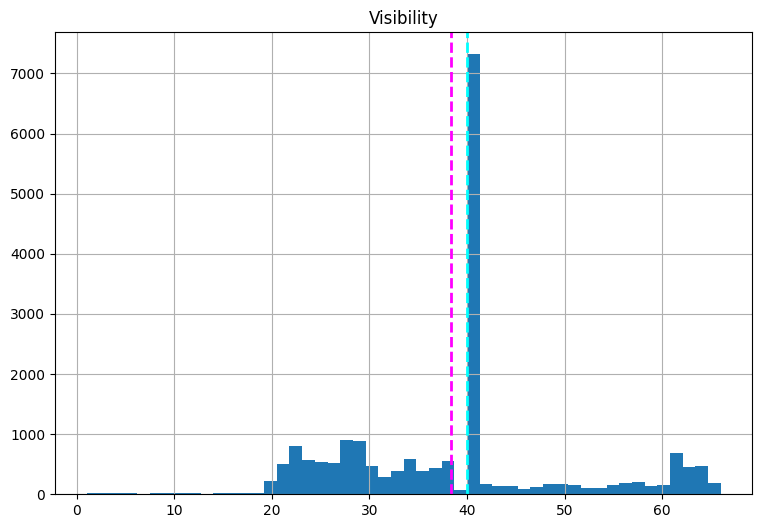

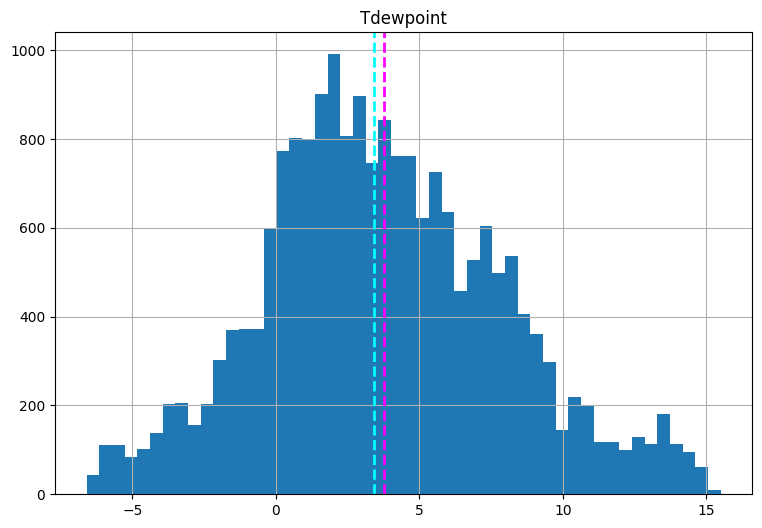

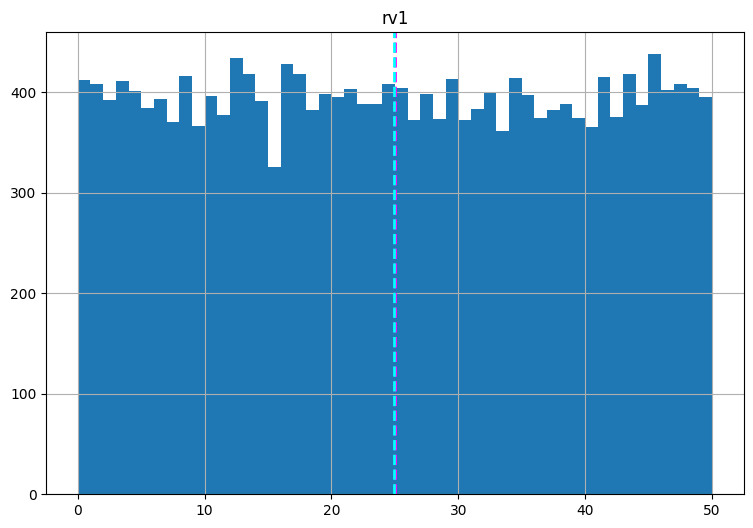

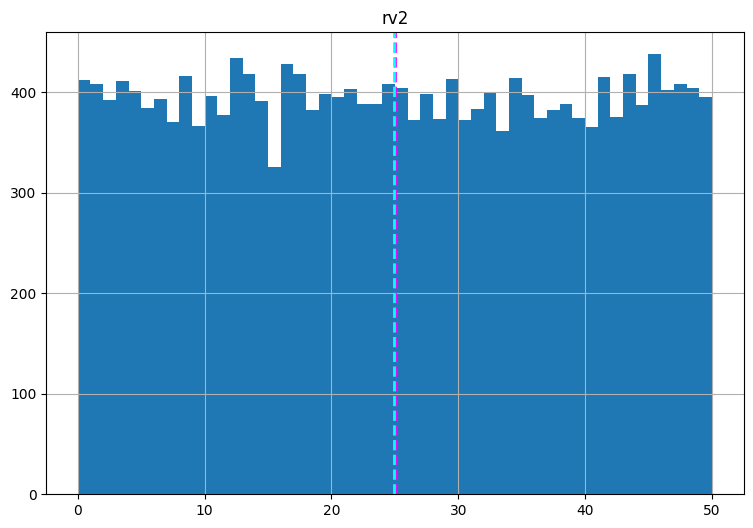

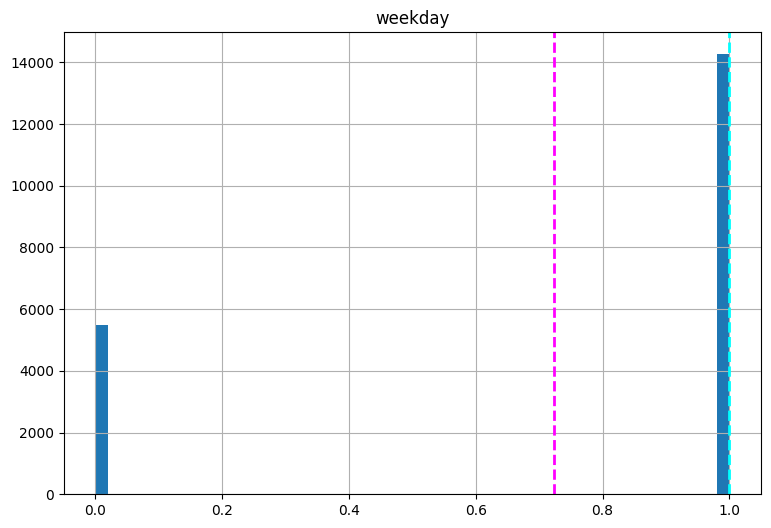

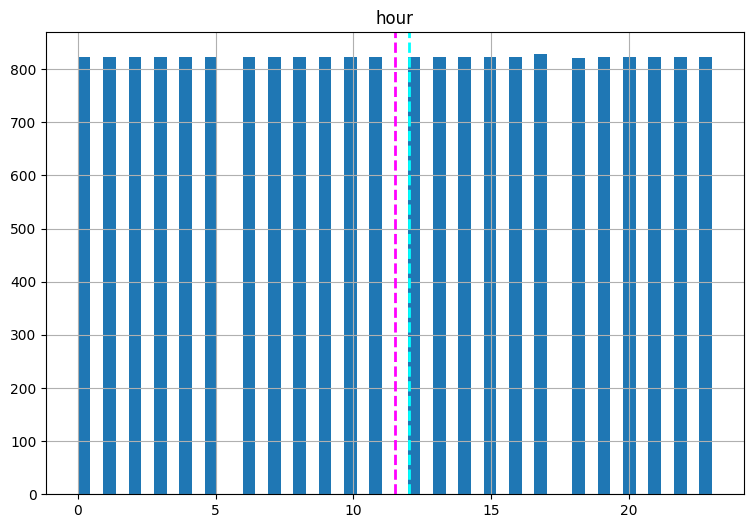

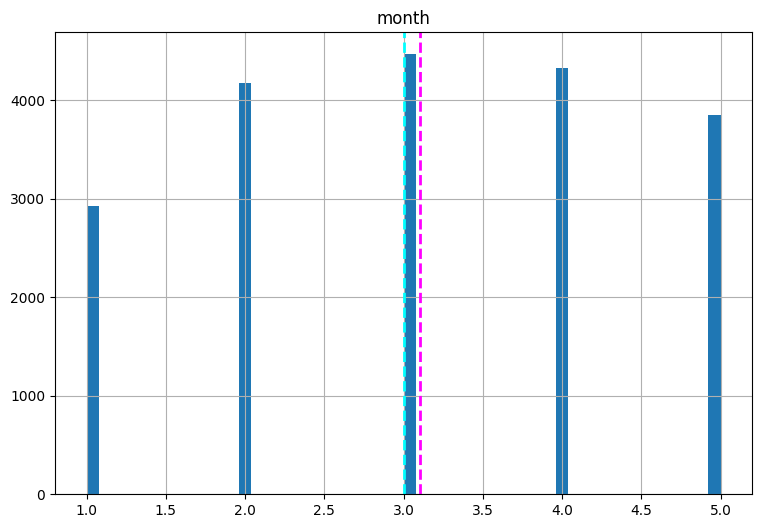

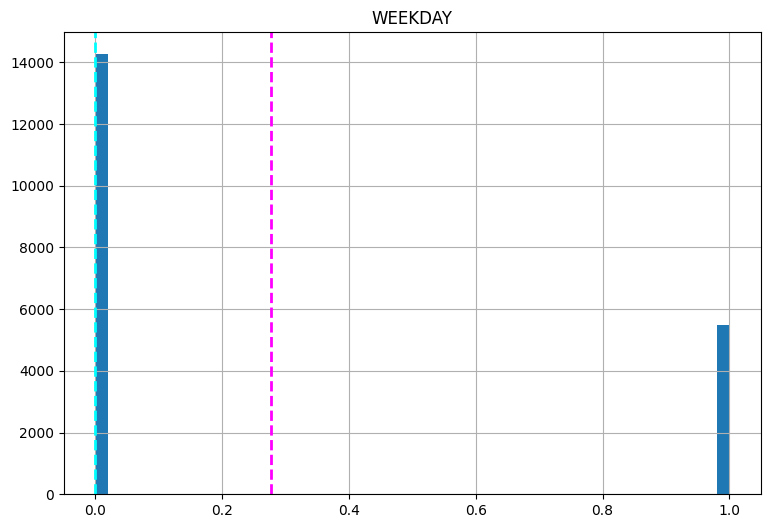

In [ ]:
#@title Default title text
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

using histogram for each numeric feature in the dataset, where the x-axis represents the range of values and the y-axis represents the frequency of occurrence for each range. The mean and median values are also shown as dashed lines on the plot. This allows us to quickly visualize the distribution of values for each feature

<ipython-input-51-0054dfec69e5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9, 6))


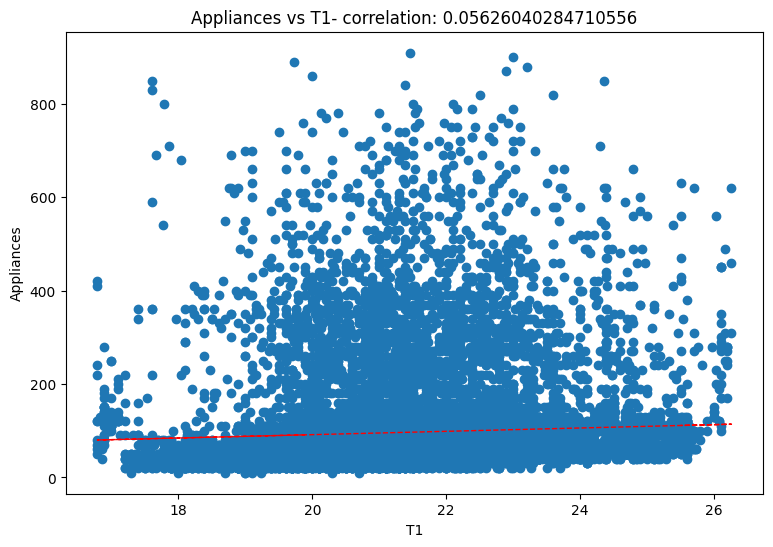

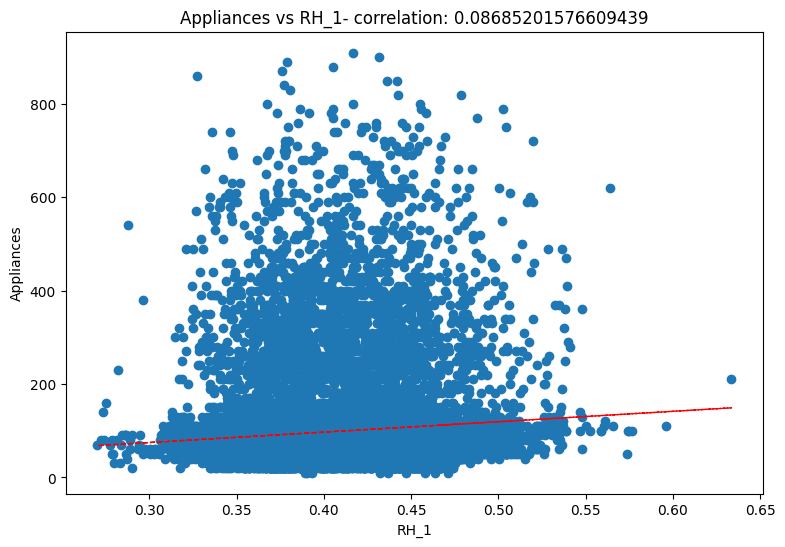

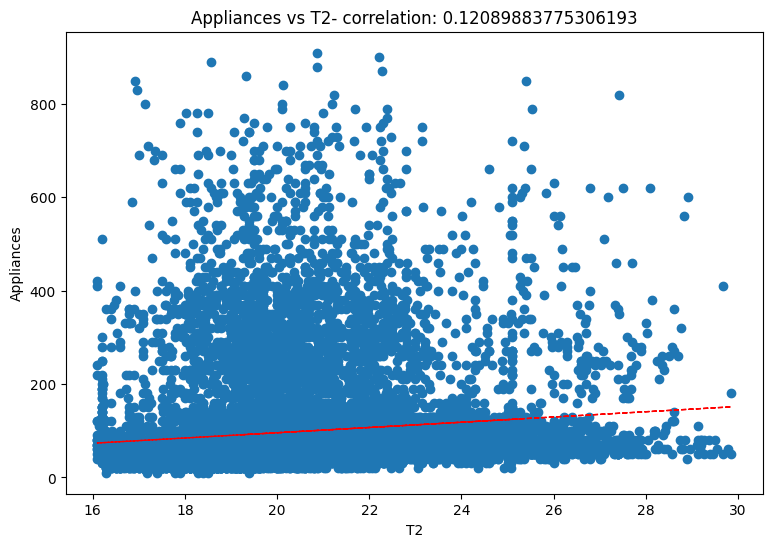

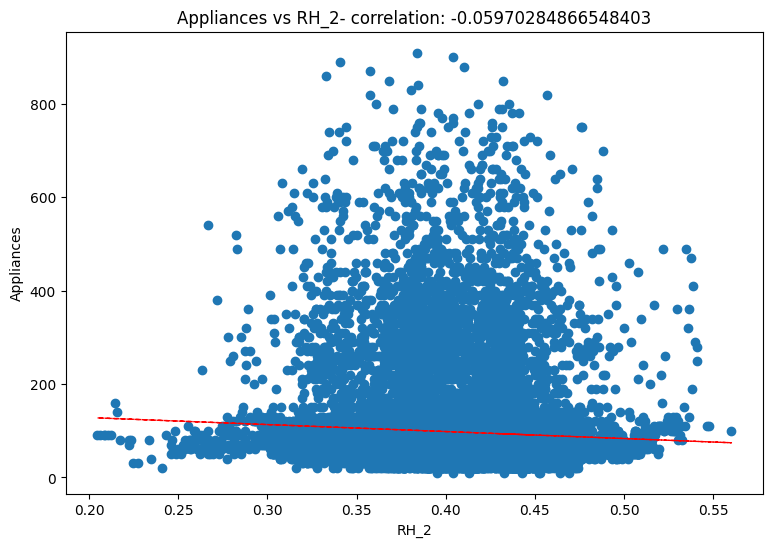

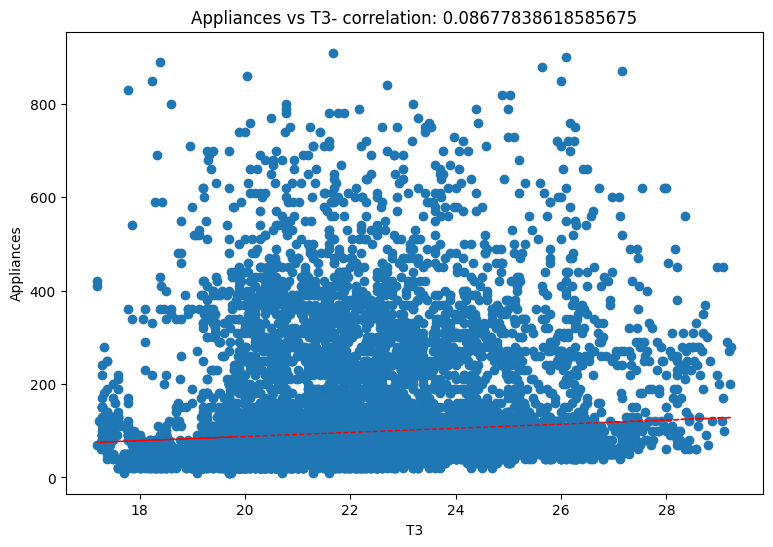

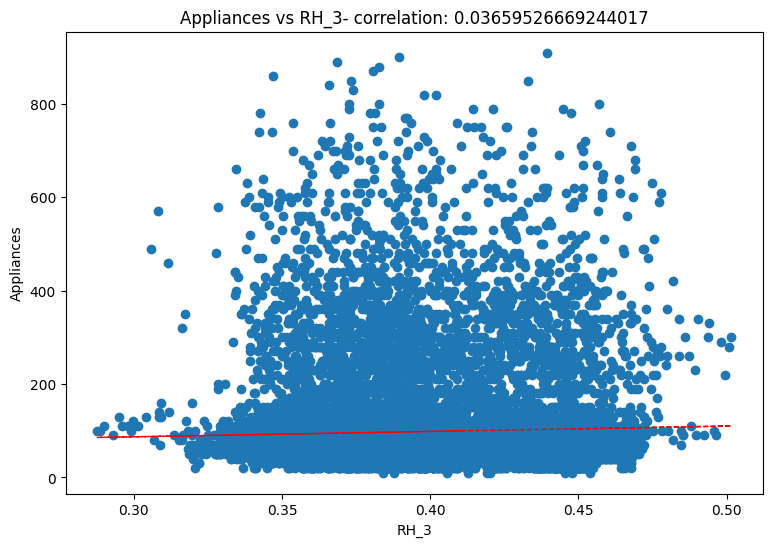

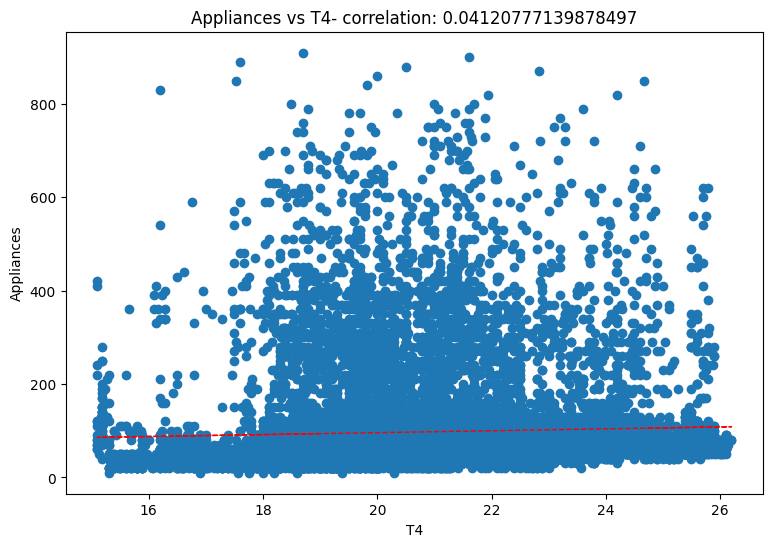

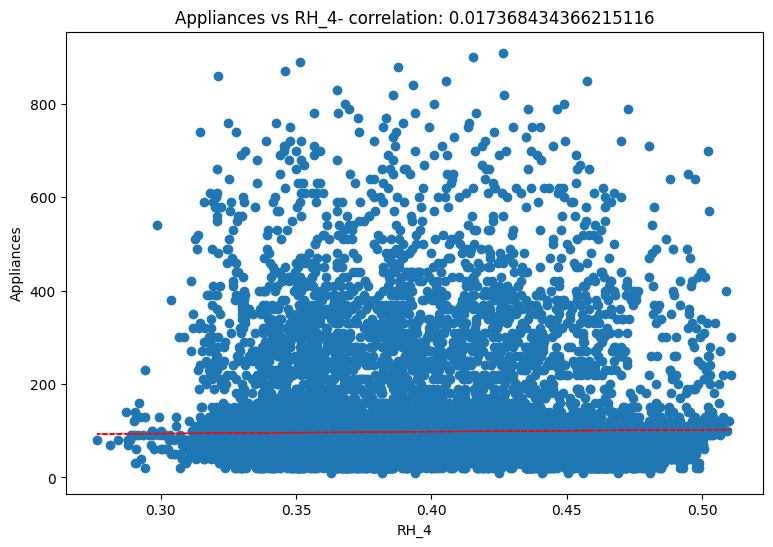

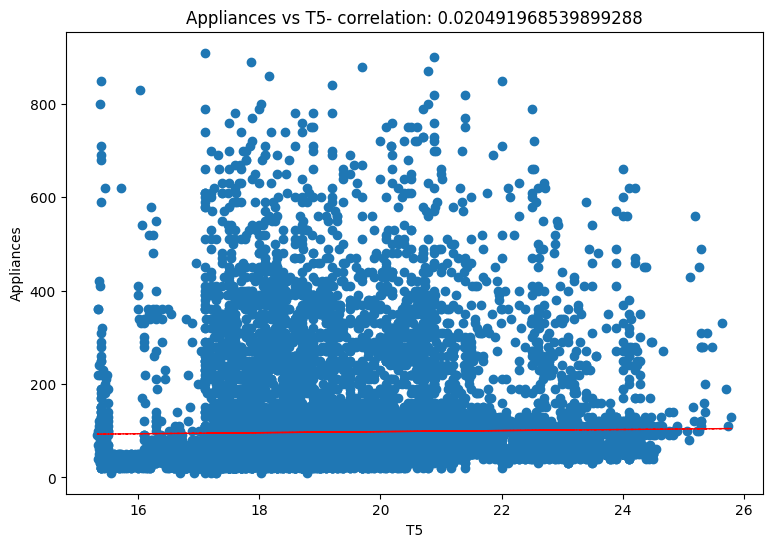

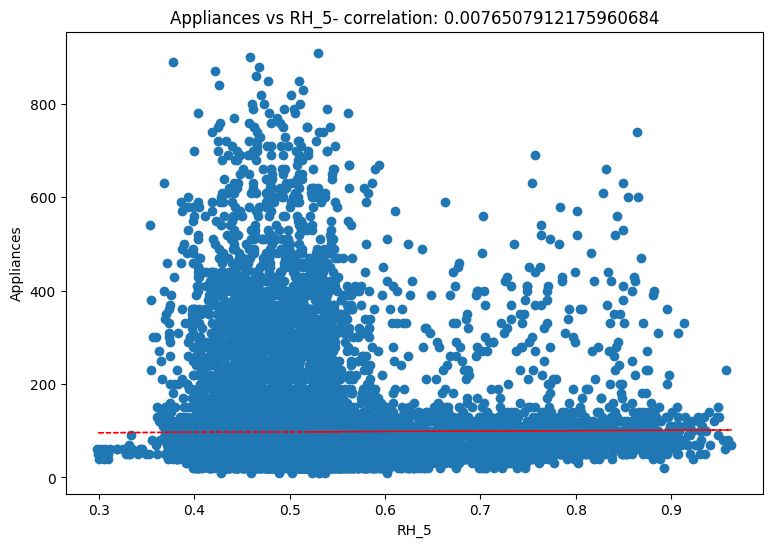

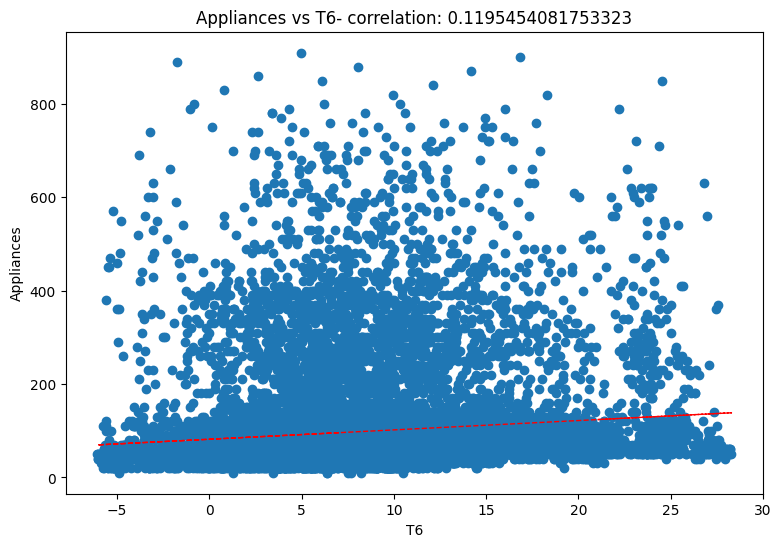

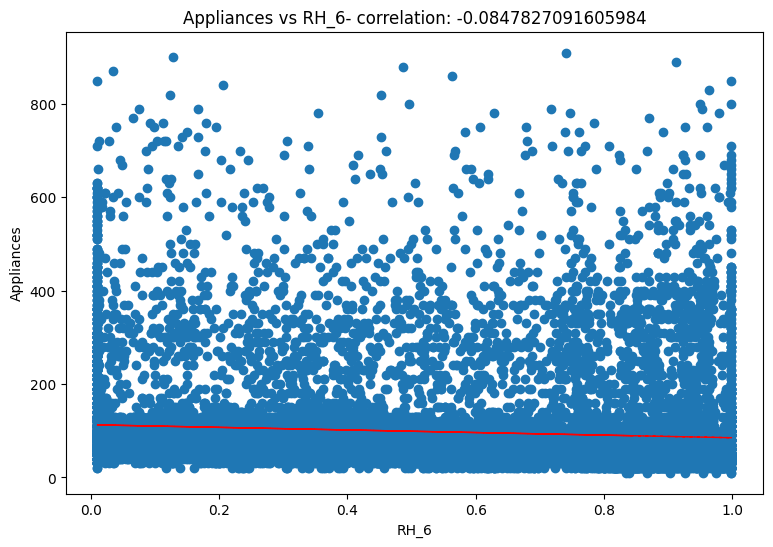

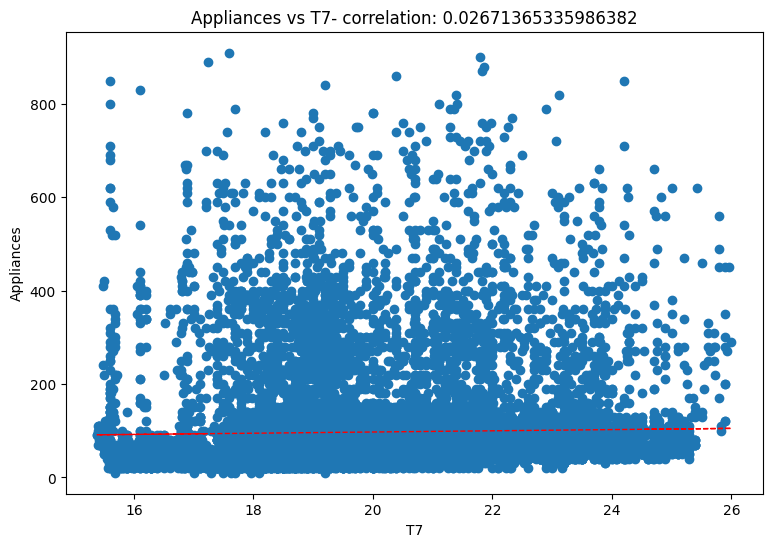

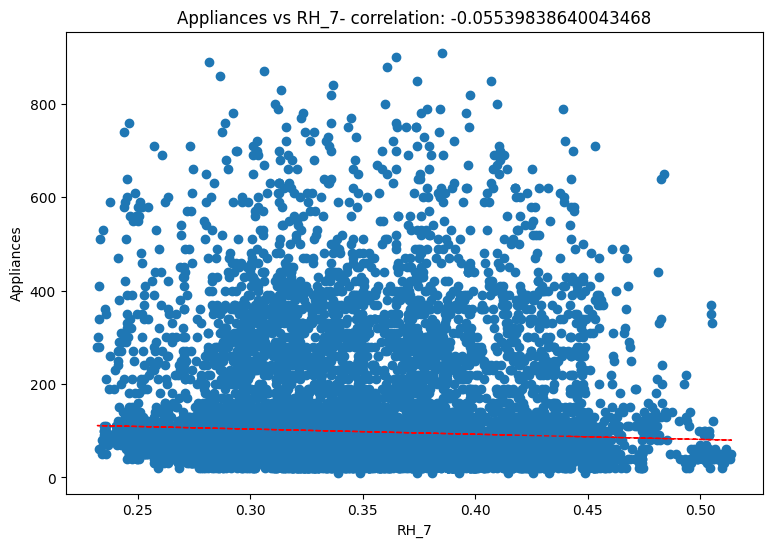

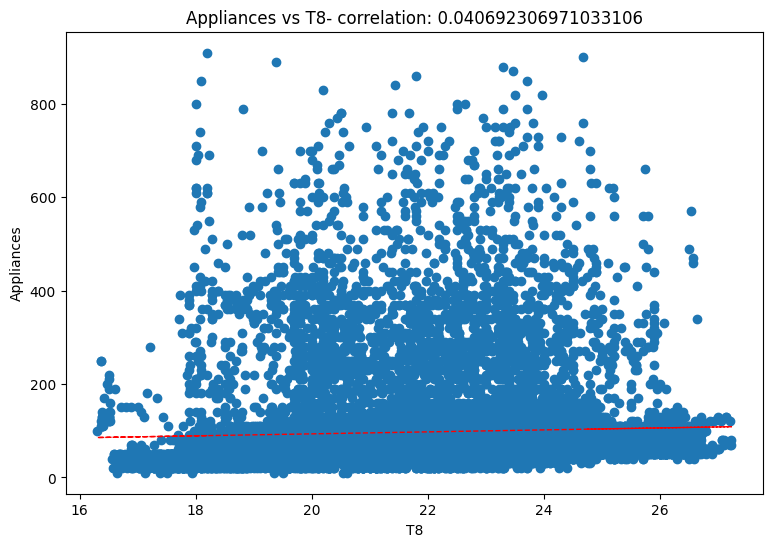

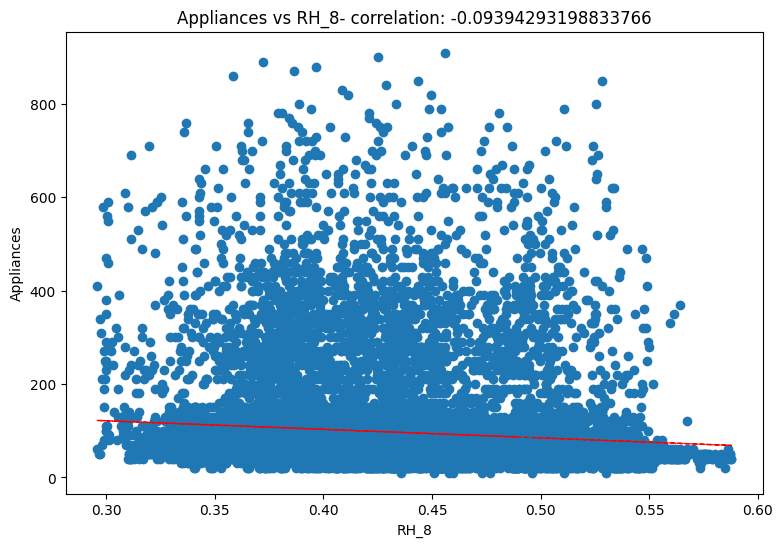

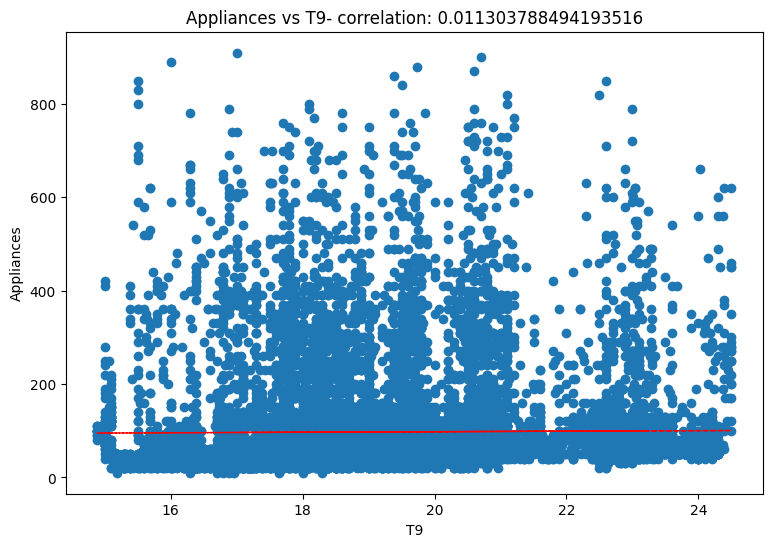

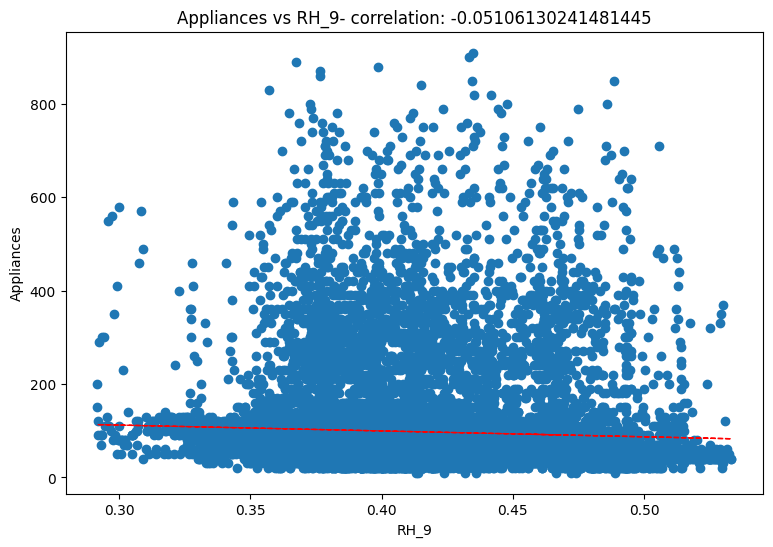

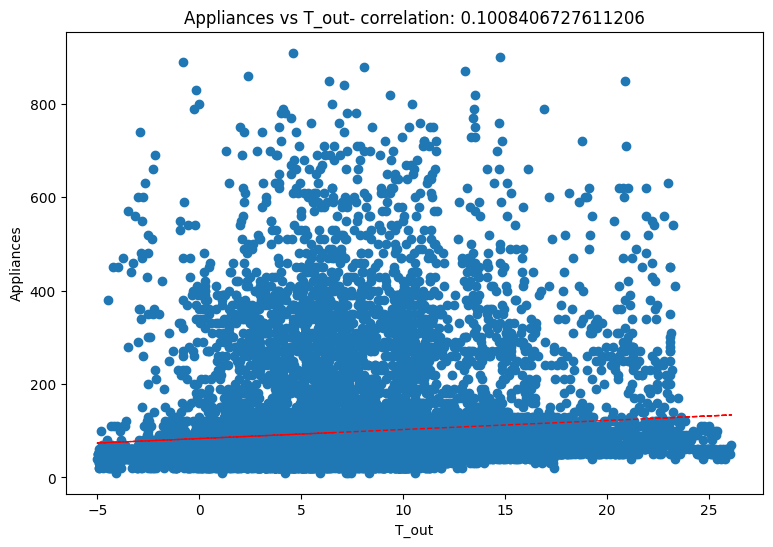

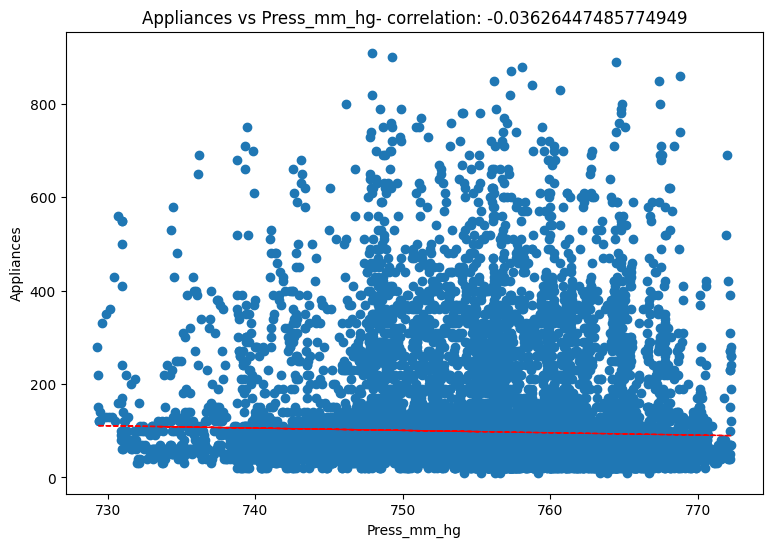

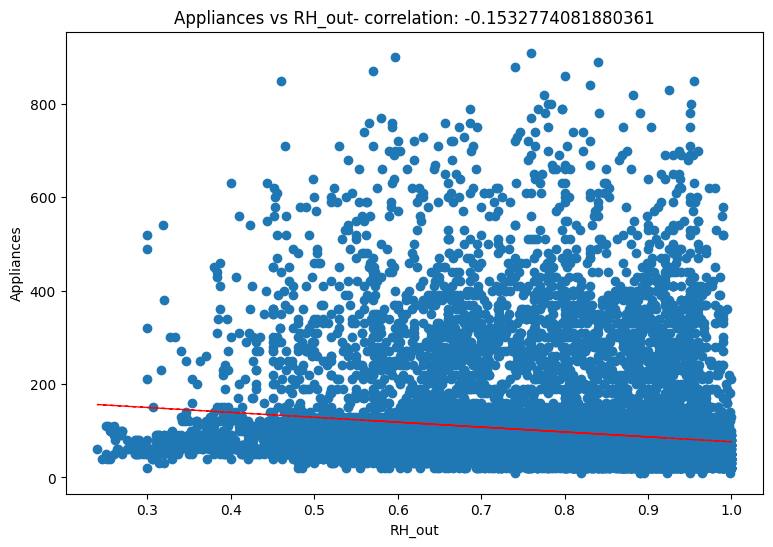

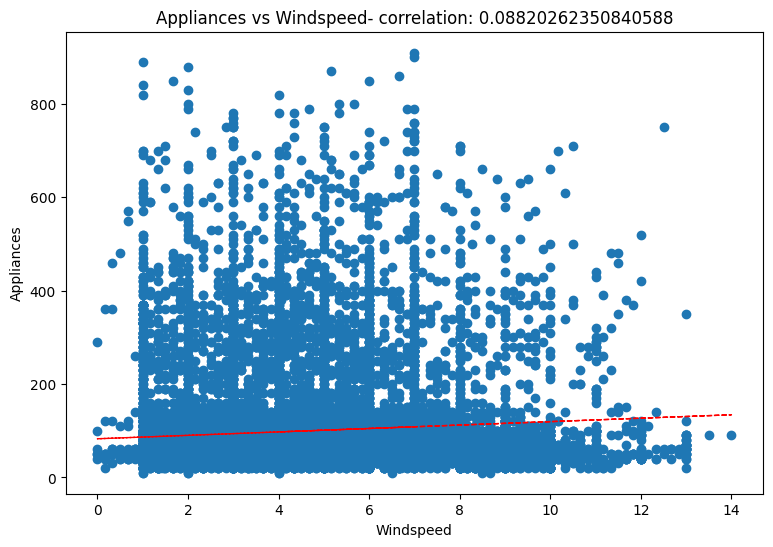

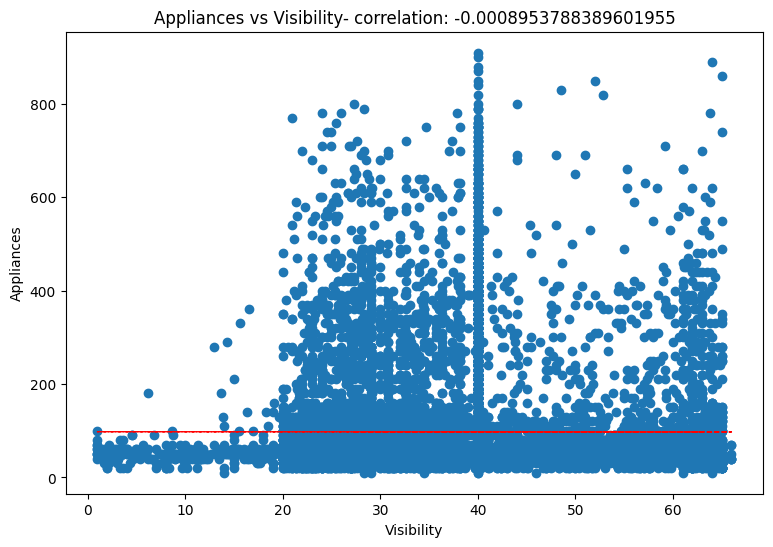

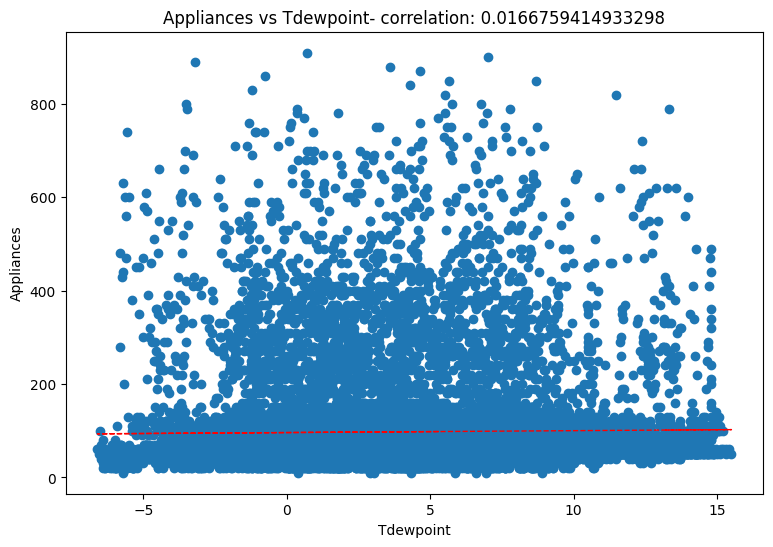

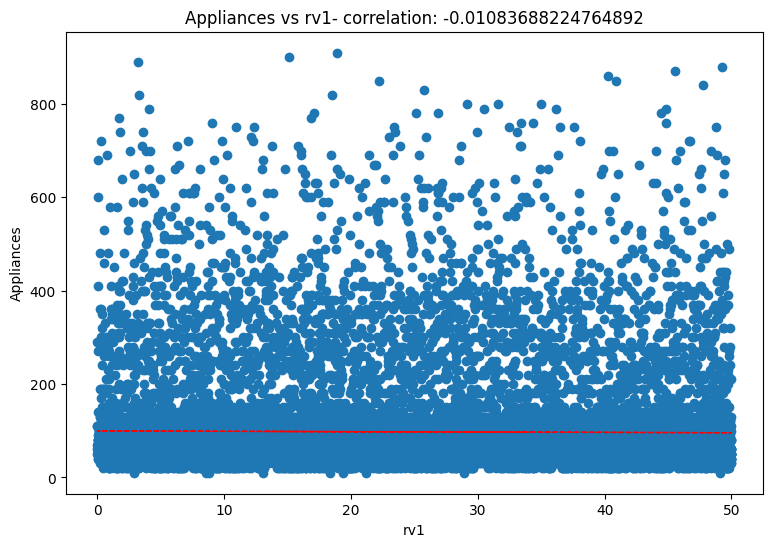

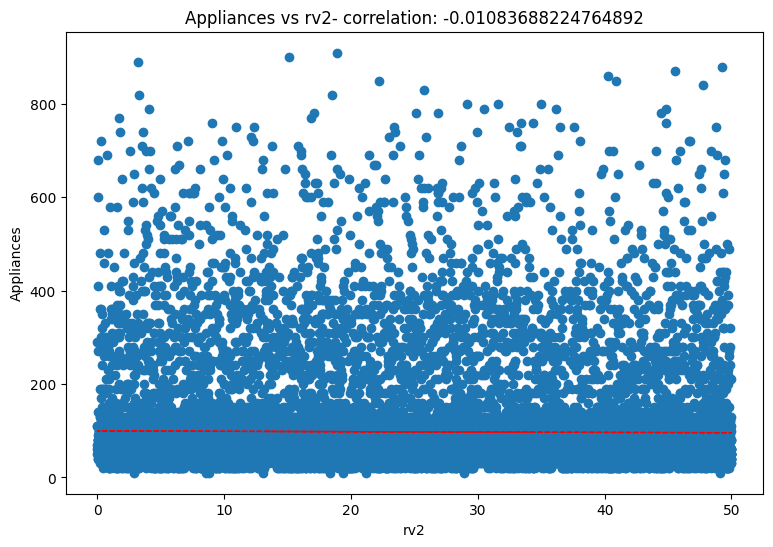

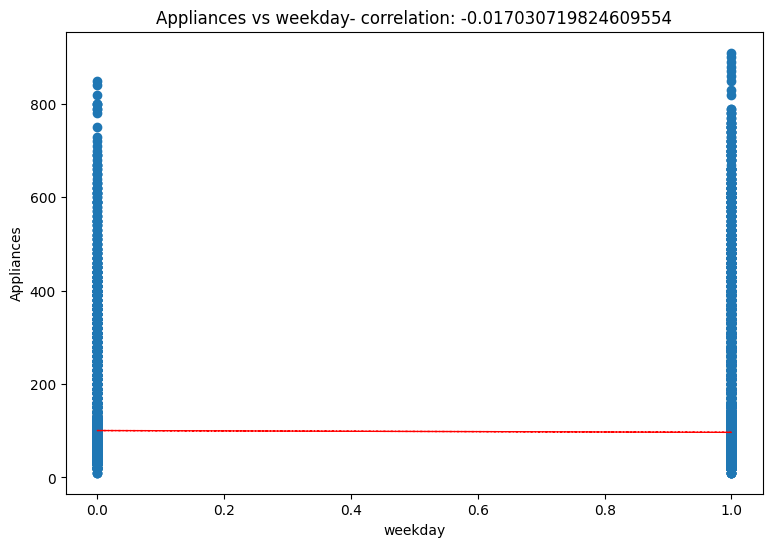

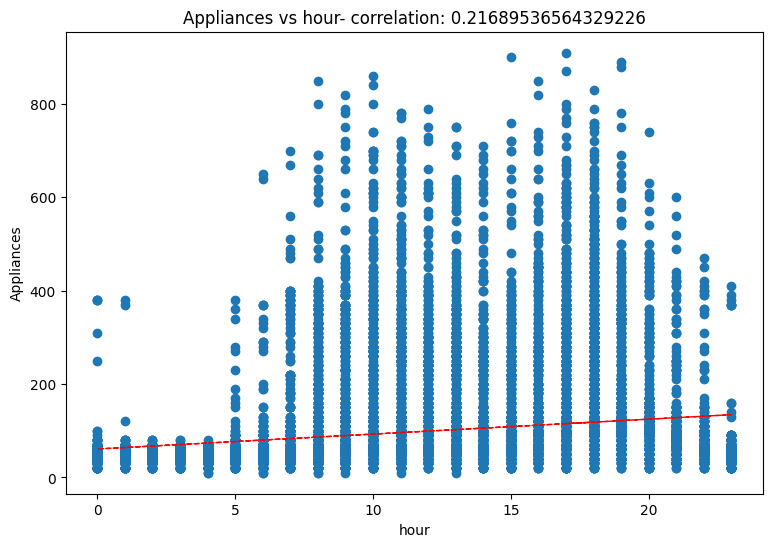

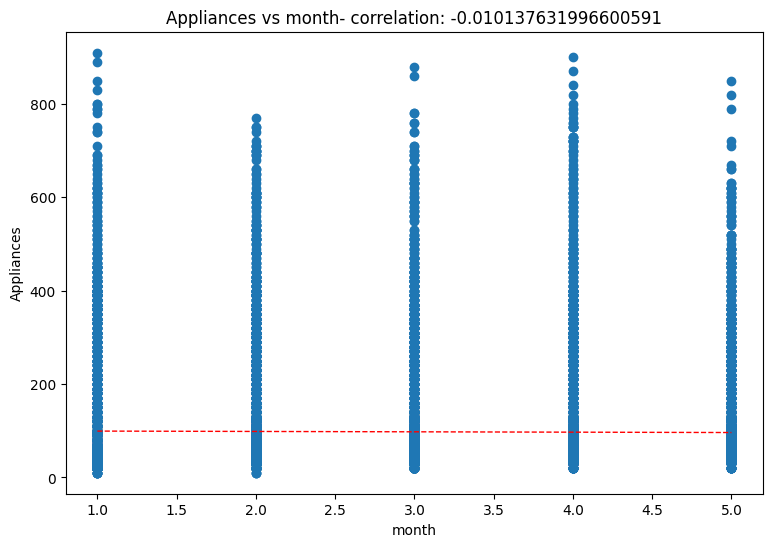

In [ ]:
for col in numeric_features[2:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Appliances'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

scatter plots for selected numerical features in the dataset, plotting the relationship between each feature and the target variable, which is the 'Appliances' column. The correlation between each feature and the target variable is also calculated and displayed in the plot title.

A scatter plot with a correlation coefficient close to zero indicates that there is no strong linear relationship between the two variables. This means that changes in one variable (such as temperature) do not necessarily lead to changes in the other variable (such as appliance energy consumption).

However, this does not necessarily mean that there is no business impact. It may still be important to understand the relationship between these variables, even if it is weak, in order to make informed business decisions. Additionally, there may be other variables that have a stronger correlation with appliance energy consumption, which can be explored further.












<Axes: >

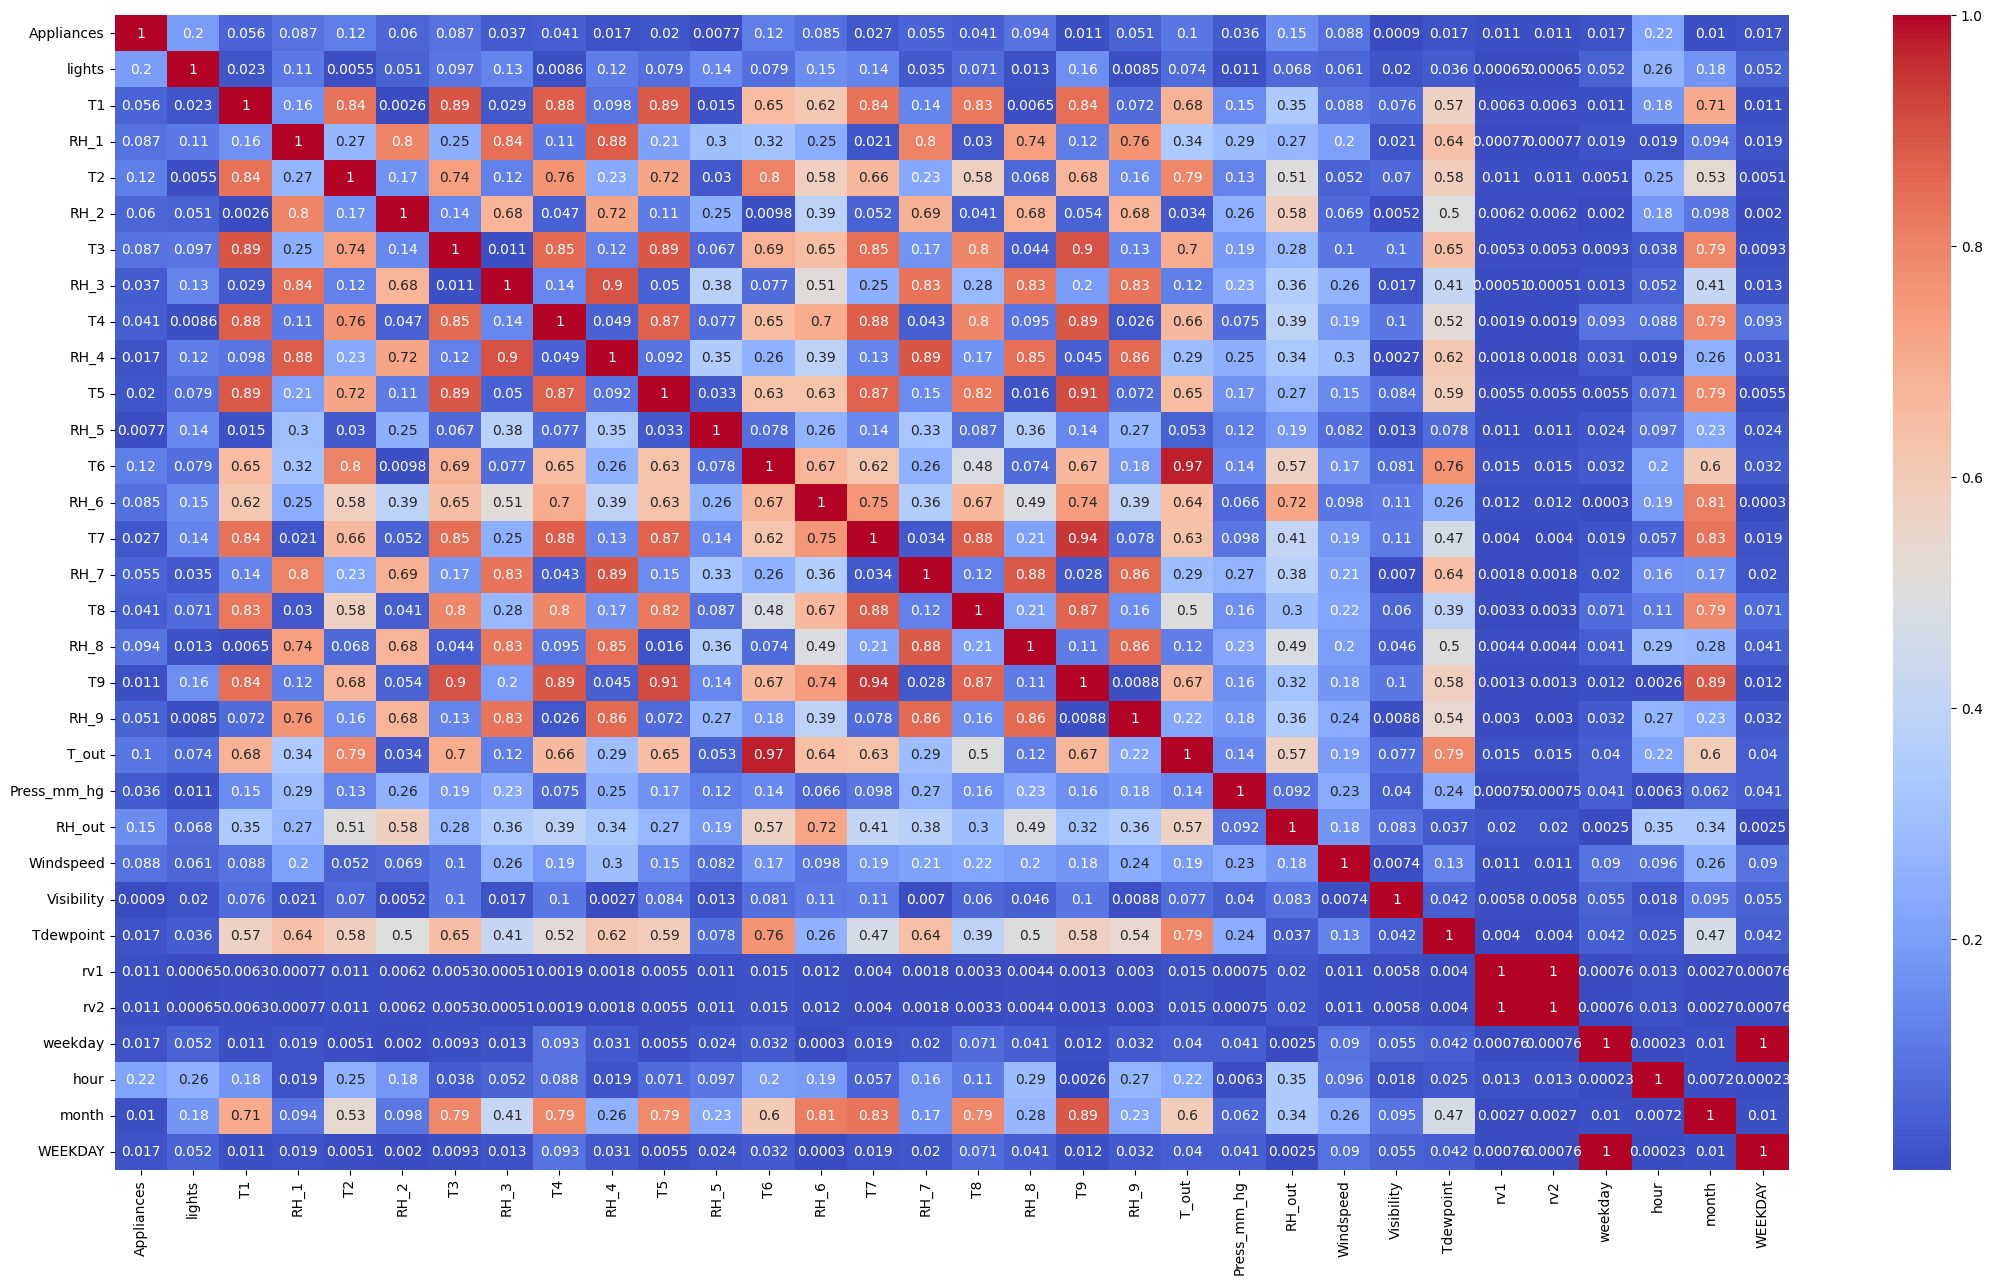

In [ ]:
 ## Correlation
plt.figure(figsize=(27,15))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

heatmap with the correlation values, making it easier to interpret and It can help identify relationships and patterns among the variables and can be useful for feature selection and identifying potential multicollinearity issues in regression analysis.

Here any feature of the Dataset doesn't have any significant correlation with the output. All the temperature variables having low and positive correlation with the target variable (Appliances), Random variable has not any significant relation with other feature of dataset

In [ ]:
correlation

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.195096  0.056260  0.086852  0.120899 -0.059703   
lights         0.195096  1.000000 -0.023350  0.107180 -0.005532  0.051379   
T1             0.056260 -0.023350  1.000000  0.163920  0.836829 -0.002609   
RH_1           0.086852  0.107180  0.163920  1.000000  0.269787  0.797544   
T2             0.120899 -0.005532  0.836829  0.269787  1.000000 -0.165687   
RH_2          -0.059703  0.051379 -0.002609  0.797544 -0.165687  1.000000   
T3             0.086778 -0.097003  0.892418  0.253153  0.735270  0.137166   
RH_3           0.036595  0.131283 -0.028602  0.844681  0.121463  0.678342   
T4             0.041208 -0.008608  0.876990  0.106075  0.762060 -0.047434   
RH_4           0.017368  0.115114  0.097811  0.880365  0.231533  0.721438   
T5             0.020492 -0.078569  0.885249  0.205757  0.720549  0.110333   
RH_5           0.007651  0.141549 -0.014881  0.303180  0.029530  0.250187   
T6             0.119545 -0.078614  0.654769  0.316114  0.801234 -0.009833   
RH_6          -0.084783  0.153436 -0.615054  0.245208 -0.580400  0.390125   
T7             0.026714 -0.135155  0.838694  0.021300  0.663650 -0.051548   
RH_7          -0.055398  0.035266  0.135100  0.801101  0.229161  0.690568   
T8             0.040692 -0.071178  0.825409 -0.030142  0.578184 -0.041155   
RH_8          -0.093943  0.013108 -0.006511  0.736188  0.068492  0.679759   
T9             0.011304 -0.157264  0.844785  0.115177  0.675550  0.054390   
RH_9          -0.051061 -0.008549  0.071689  0.763999  0.157309  0.676442   
T_out          0.100841 -0.074051  0.682841  0.340735  0.792287  0.033529   
Press_mm_hg   -0.036264 -0.011002 -0.150523 -0.293948 -0.133009 -0.255549   
RH_out        -0.153277  0.068482 -0.345487  0.274149 -0.505301  0.584984   
Windspeed      0.088203  0.060550 -0.087741  0.204865  0.052446  0.069094   
Visibility    -0.000895  0.019661 -0.076079 -0.020899 -0.069637 -0.005188   
Tdewpoint      0.016676 -0.035914  0.571284  0.639110  0.582609  0.499073   
rv1           -0.010837  0.000646 -0.006265 -0.000774 -0.011131  0.006207   
rv2           -0.010837  0.000646 -0.006265 -0.000774 -0.011131  0.006207   
weekday       -0.017031  0.051603 -0.010833  0.018742  0.005119  0.001969   
hour           0.216895  0.255184  0.178928  0.018638  0.254828 -0.183241   
month         -0.010138 -0.179048  0.706332 -0.094135  0.533513 -0.098105   
WEEKDAY        0.017031 -0.051603  0.010833 -0.018742 -0.005119 -0.001969   

                   T3      RH_3        T4      RH_4  ...    RH_out  Windspeed  \
Appliances   0.086778  0.036595  0.041208  0.017368  ... -0.153277   0.088203   
lights      -0.097003  0.131283 -0.008608  0.115114  ...  0.068482   0.060550   
T1           0.892418 -0.028602  0.876990  0.097811  ... -0.345487  -0.087741   
RH_1         0.253153  0.844681  0.106075  0.880365  ...  0.274149   0.204865   
T2           0.735270  0.121463  0.762060  0.231533  ... -0.505301   0.052446   
RH_2         0.137166  0.678342 -0.047434  0.721438  ...  0.584984   0.069094   
T3           1.000000 -0.011288  0.852773  0.122678  ... -0.281715  -0.100918   
RH_3        -0.011288  1.000000 -0.140524  0.898977  ...  0.356199   0.263161   
T4           0.852773 -0.140524  1.000000 -0.048720  ... -0.388612  -0.185862   
RH_4         0.122678  0.898977 -0.048720  1.000000  ...  0.336826   0.300158   
T5           0.888183 -0.050090  0.871816  0.091779  ... -0.273944  -0.145083   
RH_5        -0.066507  0.375394 -0.076614  0.352554  ...  0.185966   0.081959   
T6           0.686825  0.076812  0.652333  0.259022  ... -0.569138   0.169101   
RH_6        -0.647628  0.514975 -0.703157  0.392254  ...  0.718609   0.098412   
T7           0.847364 -0.250154  0.877751 -0.131271  ... -0.411217  -0.185999   
RH_7         0.172529  0.832685  0.043422  0.894303  ...  0.378549   0.212913   
T8           0.795259 -0.283286  0.796242 -0.167132  ... -0.300430  -0.218987   
RH_8         

#**Removing Multicollinearity and selecting relevant Features**

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances']]])

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


variables           VIF
0        lights  1.300366e+00
1            T1  2.013872e+01
2          RH_1  1.623907e+01
3            T2  2.882803e+01
4          RH_2  2.191879e+01
5            T3  1.023501e+01
6          RH_3  1.101554e+01
7            T4  1.022718e+01
8          RH_4  1.774416e+01
9            T5  1.061436e+01
10         RH_5  1.399629e+00
11           T6  3.439691e+01
12         RH_6  1.227012e+01
13           T7  1.792067e+01
14         RH_7  1.085128e+01
15           T8  8.460772e+00
16         RH_8  9.340897e+00
17           T9  3.199563e+01
18         RH_9  6.952889e+00
19        T_out  1.560697e+02
20  Press_mm_hg  1.410986e+00
21       RH_out  5.299284e+01
22    Windspeed  1.650499e+00
23   Visibility  1.051791e+00
24    Tdewpoint  8.814830e+01
25          rv1           inf
26          rv2           inf
27      weekday  1.462490e+04
28         hour  2.129308e+00
29        month  1.234946e+01
30      WEEKDAY  5.616977e+03

creating new features for reduction in multicollinearity

In [ ]:
dataset['RH_2_press'] = dataset['Press_mm_hg']/dataset['RH_2']

In [ ]:
dataset['T1_T2'] = dataset['T2']*dataset['T1']

In [ ]:
dataset['RH_3_RH_out'] = dataset['RH_3']/dataset['RH_out']

In [ ]:
dataset['RH_4_T7'] = dataset['T7']/dataset['RH_4']

In [ ]:
dataset['T3_T5'] = dataset['T3']/dataset['T5']

In [ ]:
dataset['temp_'] = dataset['T3_T5']/dataset['T1_T2']

In [ ]:
dataset['RH_3_RH_out_RH_1'] = dataset['RH_3_RH_out']/dataset['RH_1']

In [ ]:
dataset['RH_8_RH_9'] = dataset['RH_9']/dataset['RH_8']

In [ ]:
dataset['T4_T8'] = dataset['T8']/dataset['T4'] 

In [ ]:
dataset['RH_6_RH_7'] = dataset['RH_7']/dataset['RH_8']

In [ ]:
dataset['T6_T_out'] = dataset['T_out']/dataset['T6']

In [ ]:
dataset.drop(['T6_T_out'],axis = 1, inplace = True)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Appliances','rv1','rv2','T9','RH_2','Press_mm_hg','T1','T2','RH_3','RH_out','RH_4'
,'T7','T3','T5','T3_T5','RH_3_RH_out','RH_1','RH_8','RH_9','T8','T4','RH_7','Visibility','T_out','RH_2_press','RH_8_RH_9','T4_T8','T1_T2']]])

variables         VIF
0             lights    1.141679
1               RH_5    1.257927
2                 T6   19.087812
3               RH_6    9.503398
4          Windspeed    1.347899
5          Tdewpoint   13.847948
6            weekday  694.921454
7               hour    1.320292
8              month    7.907584
9            WEEKDAY  267.682715
10           RH_4_T7    5.496464
11             temp_    2.619225
12  RH_3_RH_out_RH_1    5.082880
13         RH_6_RH_7    1.389091

In [ ]:
#Selecting relevant features 
X = dataset[['RH_5','T6','RH_6','Windspeed','Tdewpoint','RH_4_T7','temp_','RH_3_RH_out_RH_1']]

In [ ]:
Y = dataset['Appliances']

#**Train Test Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.25,random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(14799, 8)
(4934, 8)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Fitting linear regression on the basis of new features**

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train,Y_train)

0.04612715603110695

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
reg.coef_

array([  12.88319529,  356.98423698,   18.38614207,   31.80041698,
       -276.14577749,  -26.73709342,  -29.05960804, -239.46475244])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((Y_test),(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 9926.511783280463
RMSE : 99.63188135973576


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.04749954222747543
Adjusted R2 :  0.04595233336205817


Fitting Regularized Linear regression (lasso) 

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, Y_train)

0.04612715208668117

In [ ]:
lasso.score(X_train, Y_train)

0.04612715208668117

In [ ]:
lasso.coef_

array([  12.87916868,  356.84582648,   18.36403932,   31.7971429 ,
       -276.03903942,  -26.75036091,  -29.04588805, -239.33088568])

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.173e+06, tolerance: 1.251e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.821e+06, tolerance: 1.243e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e+07, tolerance: 1.211e+04

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -9952.794943683017


In [ ]:
y_pred_test = lasso_regressor.predict(X_test)
y_pred_train = lasso_regressor.predict(X_train)

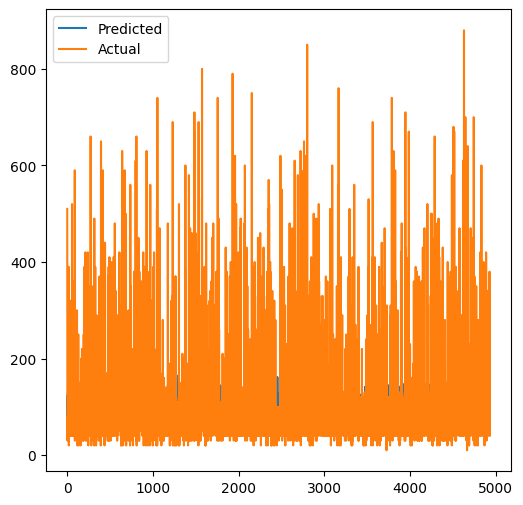

In [ ]:
plt.figure(figsize=(6,6))
plt.plot((y_pred_test))
plt.plot((np.array(Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# For Test Data

In [ ]:
MSE  = mean_squared_error((Y_test), (y_pred_test))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

test_r2 = r2_score((Y_test), (y_pred_test))
print("Test_R2 :" ,test_r2)
print("Test_Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 9926.246796254445
RMSE : 99.63055152037674
Test_R2 : 0.047524969111470194
Test_Adjusted R2 :  0.045977801548605646


# For Train Data 

In [ ]:
MSE2  = mean_squared_error((Y_train), (y_pred_train))
print("MSE :" , MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE :" ,RMSE2)

train_r2 = r2_score((Y_train), (y_pred_train))
print("Train_R2 :" ,train_r2)
print("Train_Adjusted R2 : ",1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 9932.576731546975
RMSE : 99.66231349686286
Train_R2 : 0.04612638255235402
Train_Adjusted R2 :  0.04561042657266634


#**Fitting all models on the basis of new created features**

In [ ]:
#creating the list of models
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
           
         ]

In [ ]:
model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X_train,Y_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y_train,fit_model.predict(X_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y_test,fit_model.predict(X_test))
    fit_model_data["Adjusted Train R2 score"] = 1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
    fit_model_data["Adjusted Test R2 score"] = 1-(1-r2_score((Y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,fit_model.predict(X_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y_train,fit_model.predict(X_train)))
    model_data.append(fit_model_data)


In [ ]:
model_data

[{'Name': 'Ridge: ',
  'Train_R2_Score': 0.04600879822214021,
  'Test_R2_Score': 0.04763657016429501,
  'Adjusted Train R2 score': 0.04561042657266634,
  'Adjusted Test R2 score': 0.045977801548605646,
  'Test_RMSE_Score': 99.62471451688583,
  'Train_RMSE_Score': 99.66845601147128},
 {'Name': 'KNeighborsRegressor: ',
  'Train_R2_Score': 0.6796798543615741,
  'Test_R2_Score': 0.46570734698556415,
  'Adjusted Train R2 score': 0.04561042657266634,
  'Adjusted Test R2 score': 0.045977801548605646,
  'Test_RMSE_Score': 74.62001565885284,
  'Train_RMSE_Score': 57.75341539975956},
 {'Name': 'SVR:',
  'Train_R2_Score': -0.05651106349824353,
  'Test_R2_Score': -0.061443037049223825,
  'Adjusted Train R2 score': 0.04561042657266634,
  'Adjusted Test R2 score': 0.045977801548605646,
  'Test_RMSE_Score': 105.17537784937119,
  'Train_RMSE_Score': 104.88721896507577},
 {'Name': 'RandomForest ',
  'Train_R2_Score': 0.9316336158210827,
  'Test_R2_Score': 0.5182339318941431,
  'Adjusted Train R2 score'

In [ ]:
#creating the dataframe of all models score
df = pd.DataFrame(model_data)

In [ ]:
ab = df.sort_values(by = 'Train_R2_Score',ascending= False)

## fitting polynomial features

polynomial(degree = 1)

In [ ]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)


Train_RMSE=  99.66227308967675
Train_R2_Score = 0.04612715603110695


In [ ]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  99.47077286824187
Test_R2_Score = 0.050577509597395376


polynomial(degree = 2)

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)

Train_RMSE=  97.7267803370784
Train_R2_Score = 0.08281680208957409


In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  97.54014537194149
Test_R2_Score = 0.08707452182079245


polynomial(degree = 3)

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse= np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("Train_RMSE= ",rmse)
print("Train_R2_Score =",r2)

Train_RMSE=  94.63681292689557
Train_R2_Score = 0.13989965734532994


In [ ]:
polynomial_features3= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, Y_test)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred))
r2 = r2_score(Y_test,y_poly_pred)
print("Test_RMSE= ",rmse)
print("Test_R2_Score =",r2)

Test_RMSE=  93.17392717663222
Test_R2_Score = 0.16697634812365103


In [ ]:
list_poly = [['polynomial(degree = 3)',0.699035,0.8742940,37.64486,55.55639],['Lasso',0.151375,0.129445,99.0662583,93.28977]]

In [ ]:
ab2 = pd.DataFrame(list_poly , columns= ['Name','Train_R2_Score','Test_R2_Score','Test_RMSE_Score','Train_RMSE_Score'])

In [ ]:
ab2

Name  Train_R2_Score  Test_R2_Score  Test_RMSE_Score  \
0  polynomial(degree = 3)        0.699035       0.874294        37.644860   
1                   Lasso        0.151375       0.129445        99.066258   

   Train_RMSE_Score  
0          55.55639  
1          93.28977

In [ ]:
all_models = ab.append(ab2).set_index('Name')

<ipython-input-107-fd13335b268f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_models = ab.append(ab2).set_index('Name')


In [ ]:
all_models

Train_R2_Score  Test_R2_Score  \
Name                                                         
RandomForest                       0.931634       0.518234   
XGBRegressor:                      0.781201       0.402510   
KNeighborsRegressor:               0.679680       0.465707   
GradientBoostingRegressor:         0.223872       0.160597   
Ridge:                             0.046009       0.047637   
SVR:                              -0.056511      -0.061443   
polynomial(degree = 3)             0.699035       0.874294   
Lasso                              0.151375       0.129445   

                             Adjusted Train R2 score  Adjusted Test R2 score  \
Name                                                                           
RandomForest                                 0.04561                0.045978   
XGBRegressor:                                0.04561                0.045978   
KNeighborsRegressor:                         0.04561                0.045978   
GradientBoostingRegressor:                   0.04561                0.045978   
Ridge:                                       0.04561                0.045978   
SVR:                                         0.04561                0.045978   
polynomial(degree = 3)                           NaN                     NaN   
Lasso                                            NaN                     NaN   

                             Test_RMSE_Score  Train_RMSE_Score  
Name                                                            
RandomForest                       70.857176         26.681292  
XGBRegressor:                      78.909793         47.731858  
KNeighborsRegressor:               74.620016         57.753415  
GradientBoostingRegressor:         93.529988         89.898478  
Ridge:                             99.624715         99.668456  
SVR:                              105.175378        104.887219  
polynomial(degree = 3)             37.644860         55.556390  
Lasso                              99.066258         93.289770

In [ ]:
all_models = all_models.sort_values(by = 'Test_R2_Score',ascending= False)
all_models

Train_R2_Score  Test_R2_Score  \
Name                                                         
polynomial(degree = 3)             0.699035       0.874294   
RandomForest                       0.931634       0.518234   
KNeighborsRegressor:               0.679680       0.465707   
XGBRegressor:                      0.781201       0.402510   
GradientBoostingRegressor:         0.223872       0.160597   
Lasso                              0.151375       0.129445   
Ridge:                             0.046009       0.047637   
SVR:                              -0.056511      -0.061443   

                             Adjusted Train R2 score  Adjusted Test R2 score  \
Name                                                                           
polynomial(degree = 3)                           NaN                     NaN   
RandomForest                                 0.04561                0.045978   
KNeighborsRegressor:                         0.04561                0.045978   
XGBRegressor:                                0.04561                0.045978   
GradientBoostingRegressor:                   0.04561                0.045978   
Lasso                                            NaN                     NaN   
Ridge:                                       0.04561                0.045978   
SVR:                                         0.04561                0.045978   

                             Test_RMSE_Score  Train_RMSE_Score  
Name                                                            
polynomial(degree = 3)             37.644860         55.556390  
RandomForest                       70.857176         26.681292  
KNeighborsRegressor:               74.620016         57.753415  
XGBRegressor:                      78.909793         47.731858  
GradientBoostingRegressor:         93.529988         89.898478  
Lasso                              99.066258         93.289770  
Ridge:                             99.624715         99.668456  
SVR:                              105.175378        104.887219

#**Fitting models on all feaṭures except rv1,rv2,Visibility**


Dropping random varibales because it has infinity vif factor..And visibility has very low relation close to Zero so no need of taking Visibility

In [ ]:
#Again selecting the relevent features for improving the model performance
X_ = dataset[['T1','RH_1','T2','RH_2','T3','RH_3','T4',	'RH_4',	'T5','T6','T9','RH_5','RH_6','T7','RH_7',	'T8',	'RH_8',	'RH_9','T_out',	'Press_mm_hg',	'RH_out','Windspeed','Tdewpoint'	]]

In [ ]:
X_.shape

(19733, 23)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_, Y, test_size = 0.25, random_state = 0)

In [ ]:
#Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
reg.score(X_train,Y_train)

0.14768970070893317

In [ ]:
Y_pred = reg.predict(X_test)
Y_pred

array([106.2780122 , 114.79755204,  81.17487211, ...,  99.79365887,
        77.60081446,  86.77718835])

In [ ]:
reg.coef_

array([  17.85470374,  507.70723659, -274.25424428, -515.50461404,
        296.9756265 ,   97.11090758,   30.61918036,   38.82721632,
         -4.33708929,  255.92984555, -219.78456464,   14.48521906,
         34.89529604,   19.35171934,  -47.51157376,  110.44845079,
       -175.75857777,  -36.71488669, -334.35979026,    1.84154195,
        -68.80935508,   30.13477214,  118.46751019])

In [ ]:
MSE  = mean_squared_error((Y_test),(Y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8921.863157126647
RMSE : 94.4556147464334


In [ ]:
r2 = r2_score((Y_test), (Y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (Y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.14390080555180185
Adjusted R2 :  0.1398905649260772


## **Not getting proper results on new features which created**

**Fitting Regularized Linear regression (lasso)**

In [ ]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, Y_train)

0.1476896578605409

In [ ]:
lasso.coef_

array([  17.65672831,  507.50114637, -273.82776995, -515.01594305,
        296.94158966,   97.05160287,   30.57235999,   38.75271036,
         -4.35739822,  255.59777028, -219.74256147,   14.48063608,
         34.83522425,   19.28794312,  -47.4771807 ,  110.44998204,
       -175.77522067,  -36.70160334, -333.16934408,    1.83801319,
        -68.31047251,   30.15385654,  117.74582152])

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.307e+07, tolerance: 1.251e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.303e+07, tolerance: 1.243e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.144e+07, tolerance: 1.211e+04

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -8924.430530763088


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train = lasso_regressor.predict(X_train)

In [ ]:
y_pred_lasso

array([106.13492965, 114.93209831,  81.18837463, ...,  99.96219194,
        77.419745  ,  87.02098946])

In [ ]:
y_pred_train

array([ 57.42316059,  60.61914997,  69.42382843, ...,  63.08440003,
       116.35303436,  95.40403944])

# for test data

In [ ]:
MSE  = mean_squared_error((Y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

test_r2 = r2_score((Y_test), (y_pred_lasso))
print("Test_R2 :" ,test_r2)
print("Test_Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8921.294396200046
RMSE : 94.4526039672811
Test_R2 : 0.1439553811222315
Test_Adjusted R2 :  0.13994539614581836


# for train data

In [ ]:
MSE2  = mean_squared_error((Y_train), (y_pred_train))
print("MSE :" , MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE :" ,RMSE2)

train_r2 = r2_score((Y_train), (y_pred_train))
print("Train_R2 :" ,train_r2)
print("Train_Adjusted R2 : ",1-(1-r2_score((Y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE : 8875.096964510552
RMSE : 94.20773303986543
Train_R2 : 0.1476813041022652
Train_Adjusted R2 :  0.1463545135773483


# **Fitting of all models**

In [ ]:
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] 
           
         ]

In [ ]:
model_data = []
for name,fit_model in models :
    fit_model_data = {}
    fit_model.random_state = 78
    fit_model_data["Name"] = name
    fit_model.fit(X_train,Y_train)
    fit_model_data["Train_R2_Score"] = r2_score(Y_train,fit_model.predict(X_train))
    fit_model_data["Test_R2_Score"] = r2_score(Y_test,fit_model.predict(X_test))
    fit_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,fit_model.predict(X_test)))
    fit_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(Y_train,fit_model.predict(X_train)))
    model_data.append(fit_model_data)


In [ ]:
model_data

[{'Name': 'Ridge: ',
  'Train_R2_Score': 0.14688779045183065,
  'Test_R2_Score': 0.1437188535882794,
  'Test_RMSE_Score': 94.46565182601228,
  'Train_RMSE_Score': 94.25157681053184},
 {'Name': 'KNeighborsRegressor: ',
  'Train_R2_Score': 0.6811120125815877,
  'Test_R2_Score': 0.4739838430670331,
  'Test_RMSE_Score': 74.03980677604534,
  'Train_RMSE_Score': 57.62416238711802},
 {'Name': 'SVR:',
  'Train_R2_Score': -0.003155811713168921,
  'Test_R2_Score': -0.010494438987382004,
  'Test_RMSE_Score': 102.6201626353669,
  'Train_RMSE_Score': 102.20443520784707},
 {'Name': 'RandomForest ',
  'Train_R2_Score': 0.9381920325923895,
  'Test_R2_Score': 0.5640905021929756,
  'Test_RMSE_Score': 67.40062140445988,
  'Train_RMSE_Score': 25.369258675857115},
 {'Name': 'GradientBoostingRegressor: ',
  'Train_R2_Score': 0.3269546064113825,
  'Test_R2_Score': 0.24415897119519558,
  'Test_RMSE_Score': 88.75257578804471,
  'Train_RMSE_Score': 83.7158563218316},
 {'Name': 'XGBRegressor: ',
  'Train_R2_Scor

In [ ]:
df = pd.DataFrame(model_data)

In [ ]:
ab = df.sort_values(by = 'Train_R2_Score',ascending= False).set_index('Name')
ab

Train_R2_Score  Test_R2_Score  Test_RMSE_Score  \
Name                                                                          
RandomForest                       0.938192       0.564091        67.400621   
XGBRegressor:                      0.855861       0.508481        71.570833   
KNeighborsRegressor:               0.681112       0.473984        74.039807   
GradientBoostingRegressor:         0.326955       0.244159        88.752576   
Ridge:                             0.146888       0.143719        94.465652   
SVR:                              -0.003156      -0.010494       102.620163   

                             Train_RMSE_Score  
Name                                           
RandomForest                        25.369259  
XGBRegressor:                       38.741547  
KNeighborsRegressor:                57.624162  
GradientBoostingRegressor:          83.715856  
Ridge:                              94.251577  
SVR:                               102.204435

So... there is no much difference between the new features and old features..
so we are tuning the hyperparameters on the basis of old features itself..

## **Barplot of all models**

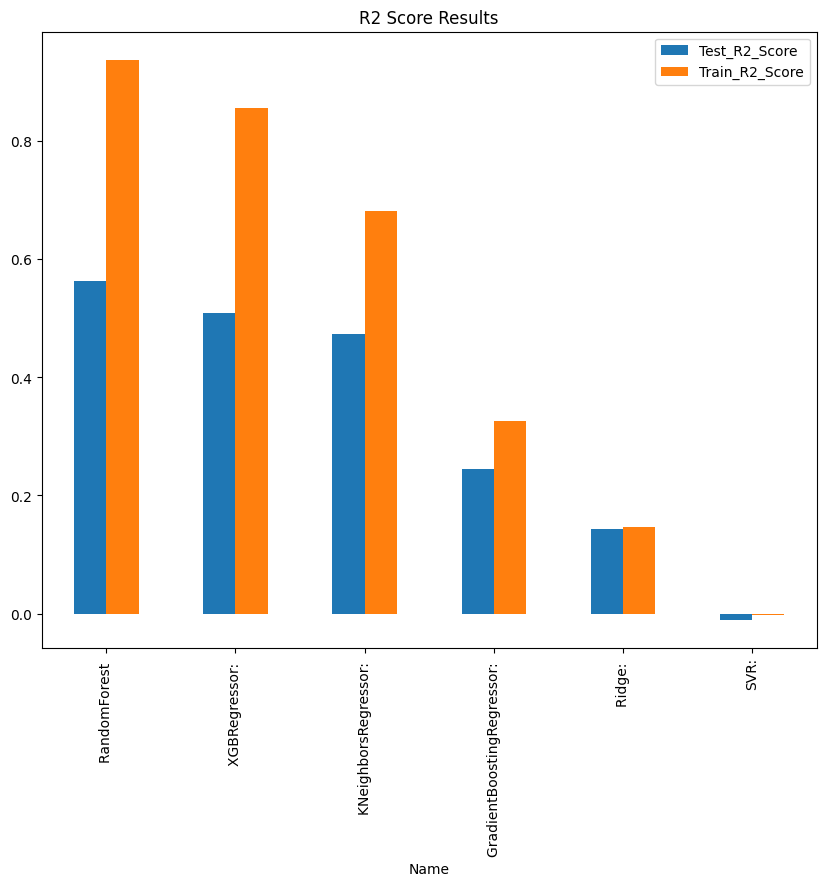

In [ ]:
ab.plot(y=['Test_R2_Score','Train_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

#**Hyperparameter Tuning using GridSearchCV** 

In [ ]:
#Tuning the hyperparameters of Random forest using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [10, 20, 30, 40, 50, 60, 70,80],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = RandomForestRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(X_train,Y_train)

In [ ]:
grid_search.best_estimator_.score(X_test,Y_test)

In [ ]:
np.sqrt(mean_squared_error(Y_test, grid_search.best_estimator_.predict(X_test)))

In [ ]:
np.sqrt(mean_squared_error(Y_train, grid_search.best_estimator_.predict(X_train)))

In [ ]:
#making a list of specific model score
list_final = [['polynomial(degree = 3)',0.699035,0.8742940,37.64486,55.55639],['Lasso',0.151375,0.129445,99.0662583,93.28977],['Tuned Random Forest',0.9434,0.5864,65.645,24.26]]

In [ ]:
#creating Dataframe
ab2 = pd.DataFrame(list_final , columns= ['Name','Train_R2_Score','Test_R2_Score','Test_RMSE_Score','Train_RMSE_Score']).set_index('Name')

In [ ]:
#appending list into original Dataframe
all_models_ = ab.append(ab2).sort_values(by = 'Train_R2_Score',ascending= False)
all_models_

# **Updated Bar Plot**

In [ ]:
#Bar plot of all the model scores
all_models_.plot(y=['Test_R2_Score','Train_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

#**Conclusion**



*  The dataset does not contain any null values.. but there is very less correlation between the features and target variables 

*  Dropped some irrelevent features like rv1 , rv2 which has infinity (variance inflation factor)...so no use of these features and Visibility which has very less correlation 

*  Worked on reduction of multicollinearity by created some new features with  some proper relation but there is not showing any imporovement in the results.. so we continued with old features itself 

*  By fitting all the models we are getting best score in Random forest regressor after tuning the hyperparameters using Grid Search CV on this model ..not getting much difference Train r score is 0.94 and Test r score is 0.5864 because of improper dataset and less correlation


*  The performance is low due to various reasons like: no proper pattern of data, too much data, less correlation, not enough relevant features.







